In [9]:
library(ggplot2)

In [10]:
install.packages('ggplot2movies')

Warning message:
"package 'ggplot2movies' is in use and will not be installed"


In [11]:
library(ggplot2movies)

In [12]:
?movies

## Histograms with ggplot2

In [13]:
df <- movies <- movies[sample(nrow(movies), 1000), ]

In [18]:
head(df,5)
tail(df,5)

title,year,length,budget,rating,votes,r1,r2,r3,r4,⋯,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
"Karnival Kid, The",1929,8,NA,6.8,40,0.0,0,0.0,4.5,⋯,4.5,14.5,,0,1,1,0,0,0,1
Aqui na Terra,1993,105,NA,4.8,8,0.0,0,0.0,24.5,⋯,0.0,0.0,,0,0,0,1,0,0,0
"Mondo porno di due sorelle, Il",1978,98,NA,1.9,16,34.5,0,14.5,4.5,⋯,0.0,34.5,,0,0,0,1,0,0,0
Agapi kai aima,1968,105,NA,6.7,9,24.5,0,0.0,0.0,⋯,0.0,14.5,,0,0,0,1,0,0,0
It's Showtime,1976,85,NA,5.8,17,14.5,0,0.0,14.5,⋯,0.0,4.5,,0,0,0,0,1,0,0


title,year,length,budget,rating,votes,r1,r2,r3,r4,⋯,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
"Strip, The",1951,85,NA,5.9,54,0.0,0.0,0.0,4.5,⋯,4.5,4.5,,0,0,0,1,0,0,0
She's Back,1989,89,NA,2.9,19,24.5,14.5,24.5,0.0,⋯,0.0,14.5,,0,0,1,0,0,0,0
Okaeri,1995,199,NA,6.6,32,4.5,0.0,4.5,0.0,⋯,24.5,24.5,,0,0,0,1,0,0,0
Piravi,1988,110,NA,7.4,18,0.0,0.0,4.5,4.5,⋯,14.5,45.5,,0,0,0,1,0,0,0
Wanee wa Junah,2001,115,NA,7.3,72,4.5,4.5,4.5,4.5,⋯,24.5,14.5,,0,0,0,1,0,1,0


## Using qplot()

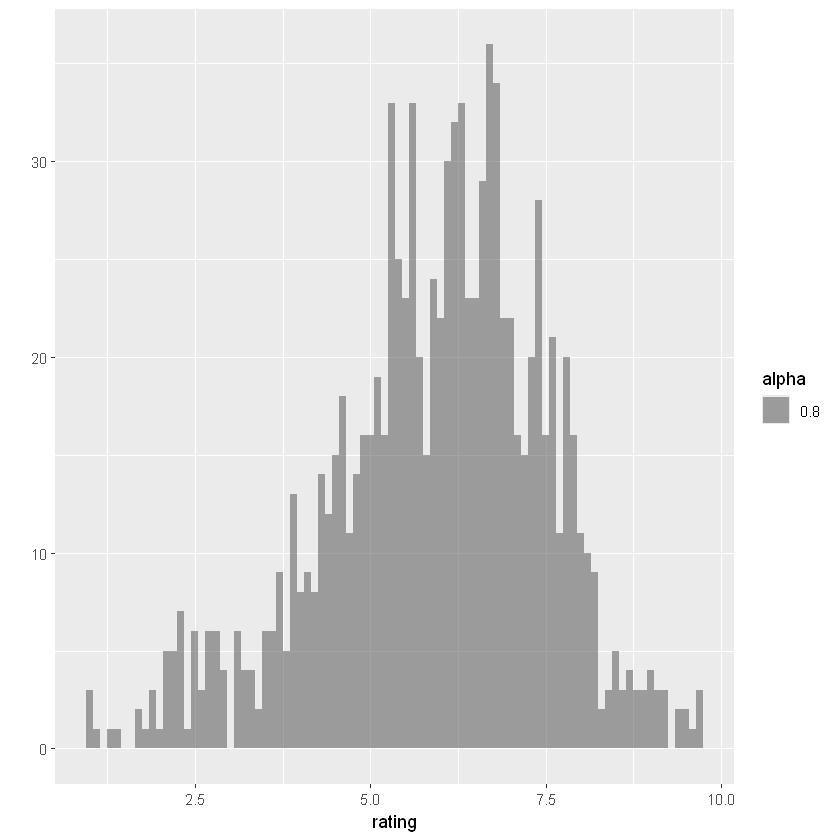

In [26]:
qplot(rating,data=df,geom='histogram',binwidth=0.1,alpha=0.8)

## Using ggplot()

Let's see how we can really expand on this by using ggplot! They syntax starts off with the base plot:

In [14]:
# ggplot(data, aesthetics)
pl <- ggplot(df,aes(x=rating))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


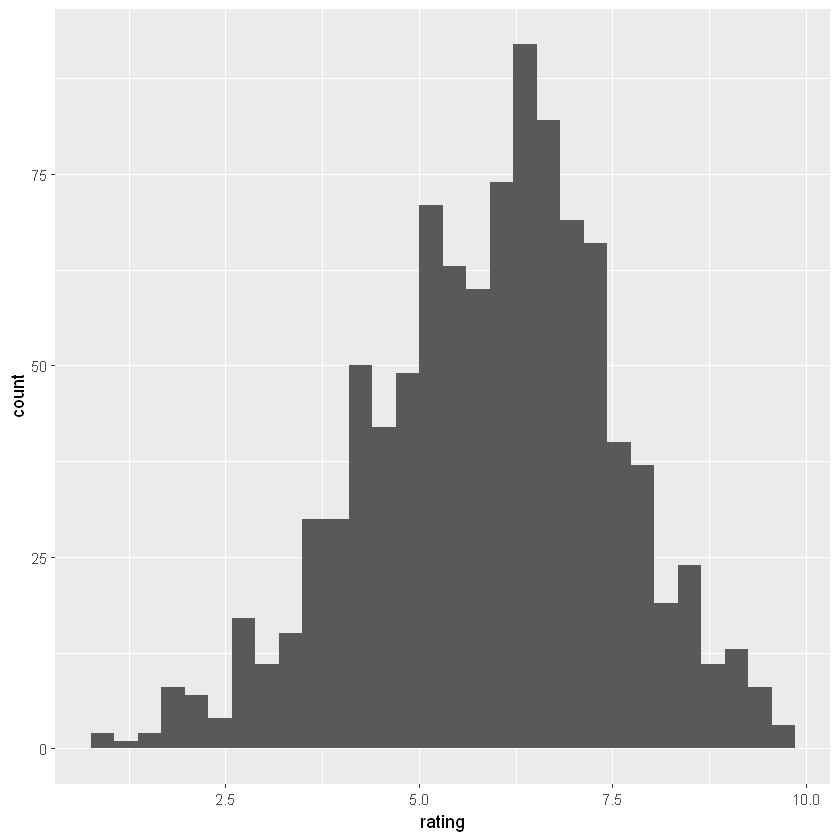

In [15]:
# Add Histogram Geometry
pl + geom_histogram()

### Adding Color

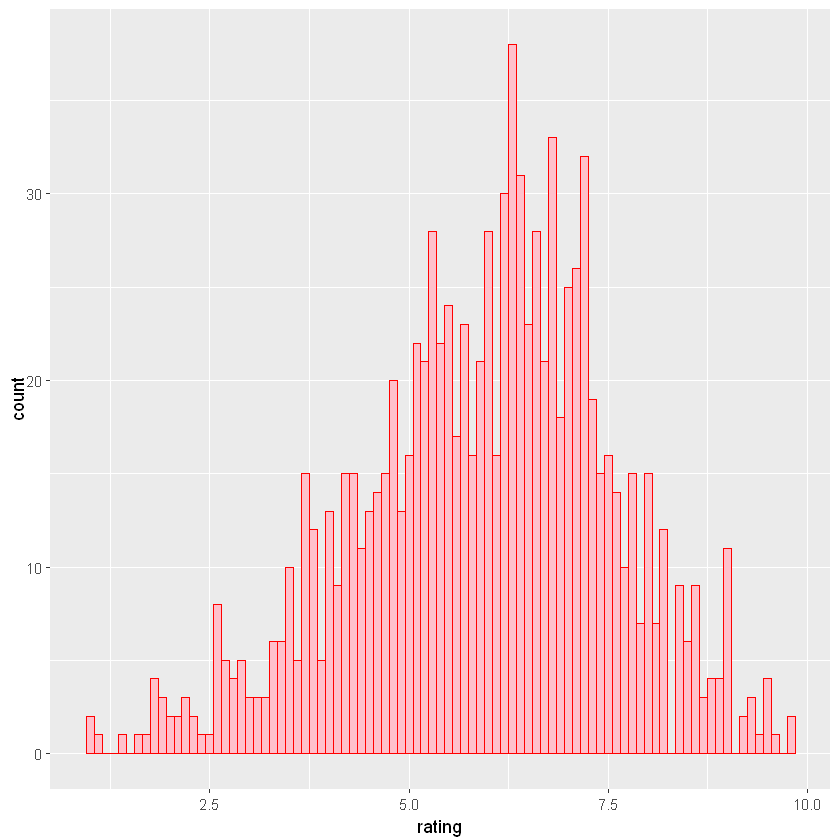

In [16]:
pl <- ggplot(df,aes(x=rating))
pl + geom_histogram(binwidth=0.1,color='red',fill='pink')

### Adding Labels

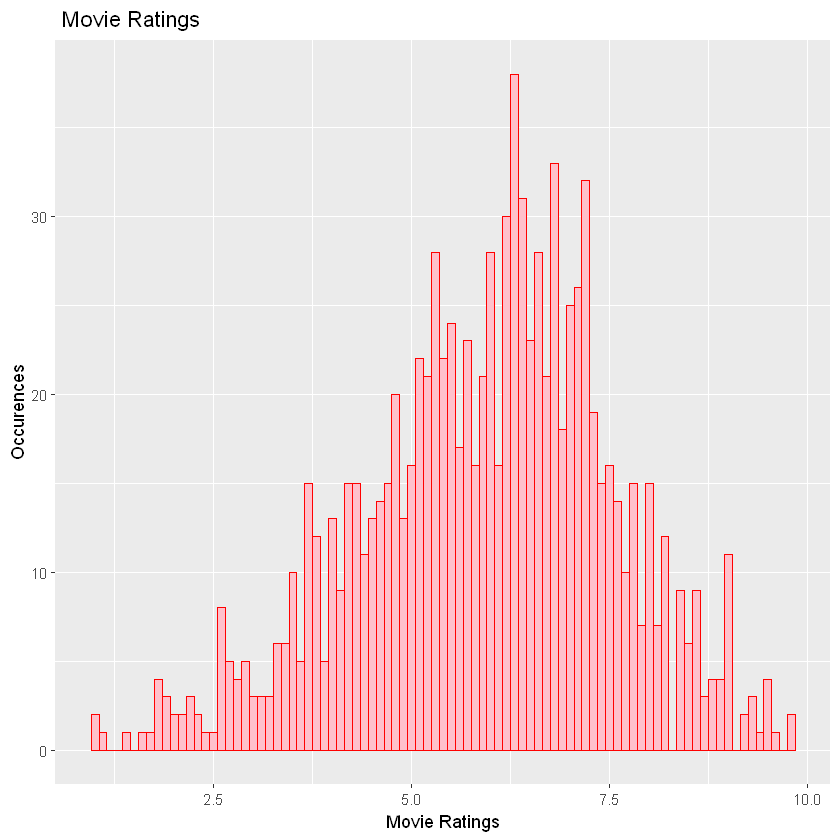

In [17]:
pl <- ggplot(df,aes(x=rating))
pl + geom_histogram(binwidth=0.1,color='red',fill='pink') + xlab('Movie Ratings')+ ylab('Occurences') + ggtitle(' Movie Ratings')

### Change Alpha (Transparency)

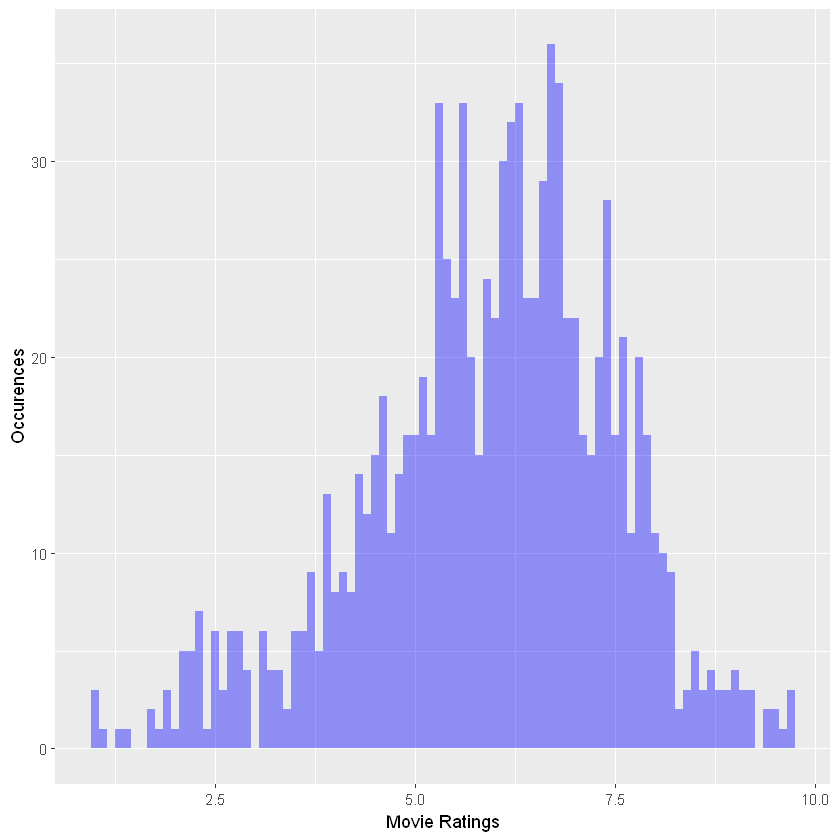

In [28]:
pl <- ggplot(df,aes(x=rating))
pl + geom_histogram(binwidth=0.1,fill='blue',alpha=0.4) + xlab('Movie Ratings')+ ylab('Occurences')

### Linetypes

We have the options: "blank", "solid", "dashed", "dotted", "dotdash", "longdash", and "twodash". You would never really use these with a histogram, but just to show your options:

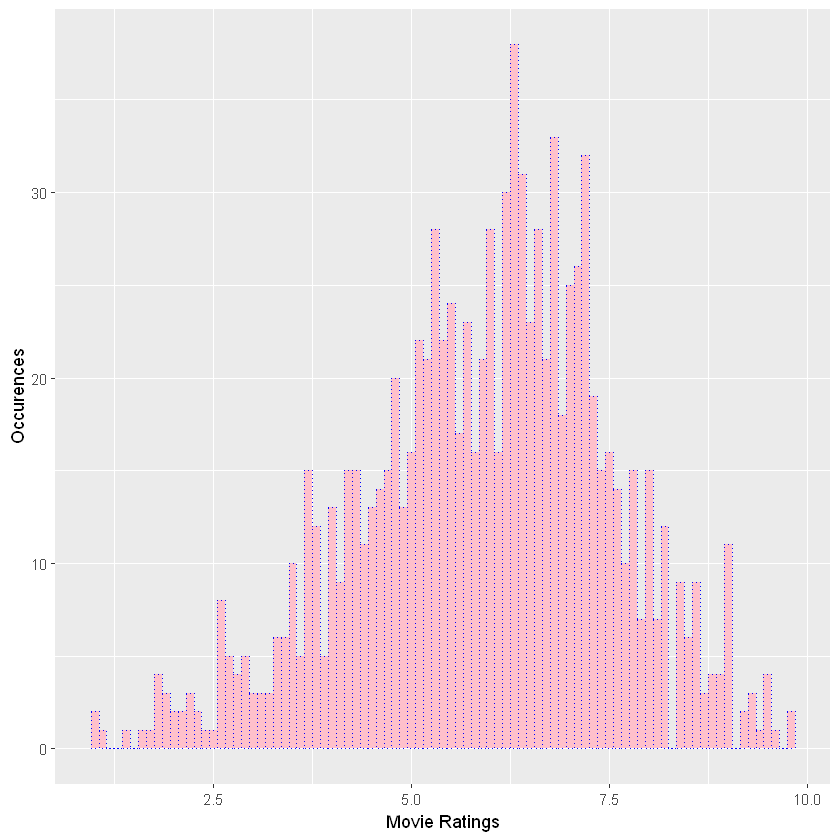

In [19]:
pl <- ggplot(df,aes(x=rating))
pl + geom_histogram(binwidth=0.1,color='blue',fill='pink',linetype='dotted') + xlab('Movie Ratings')+ ylab('Occurences')

### Advanced Aesthetics

We can add a aes() argument to the geom_histogram for some more advanced features. We won't go too deep into these, but ggplot gives you the ability to edit color and fill scales.

Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


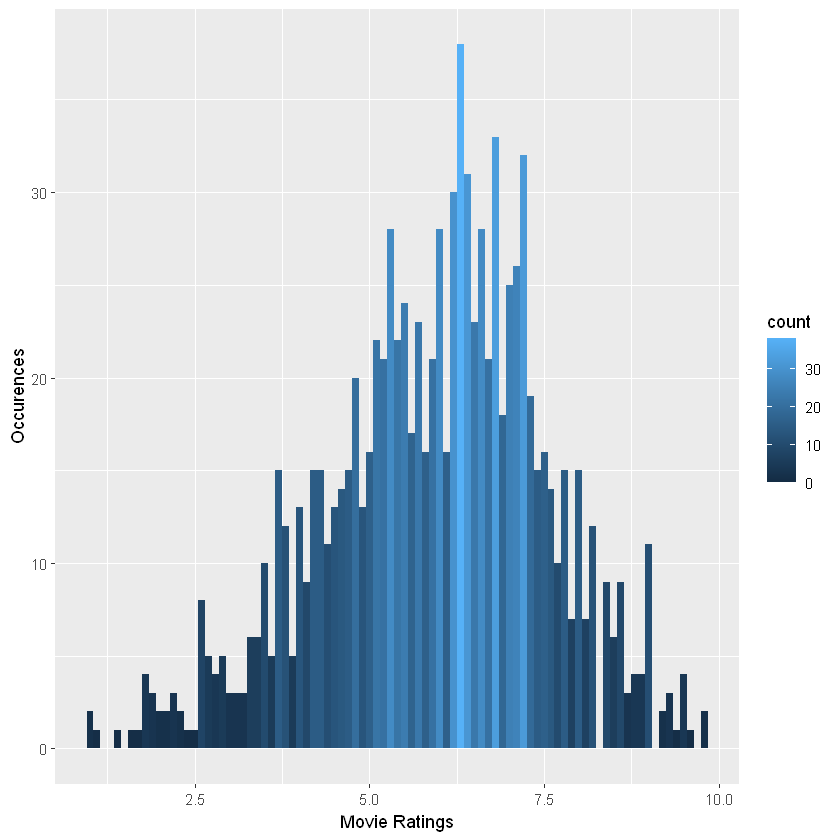

In [20]:
# Adding Labels
pl <- ggplot(df,aes(x=rating))
pl + geom_histogram(binwidth=0.1,aes(fill=..count..)) + xlab('Movie Ratings')+ ylab('Occurences')

You can further edit this by adding the scale_fill_gradient() function to your ggplot objects:

In [21]:
# Adding Labels
pl <- ggplot(df,aes(x=rating))
pl2 <- pl + geom_histogram(binwidth=0.1,aes(fill=..count..)) + xlab('Movie Ratings')+ ylab('Occurences')

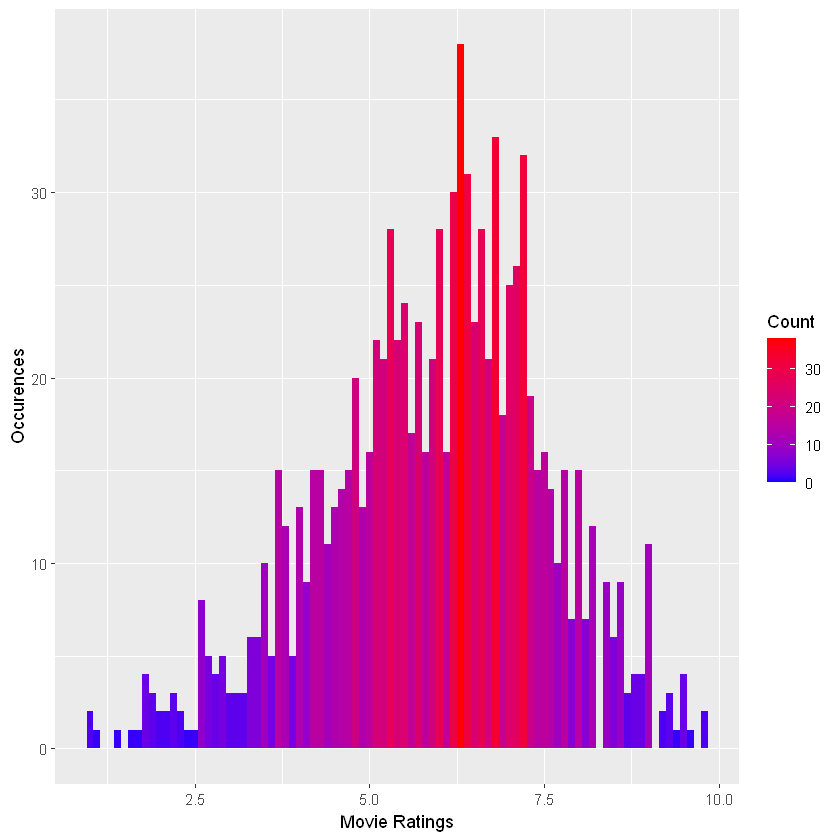

In [22]:
# scale_fill_gradient('Label',low=color1,high=color2)
pl2 + scale_fill_gradient('Count',low='blue',high='red')

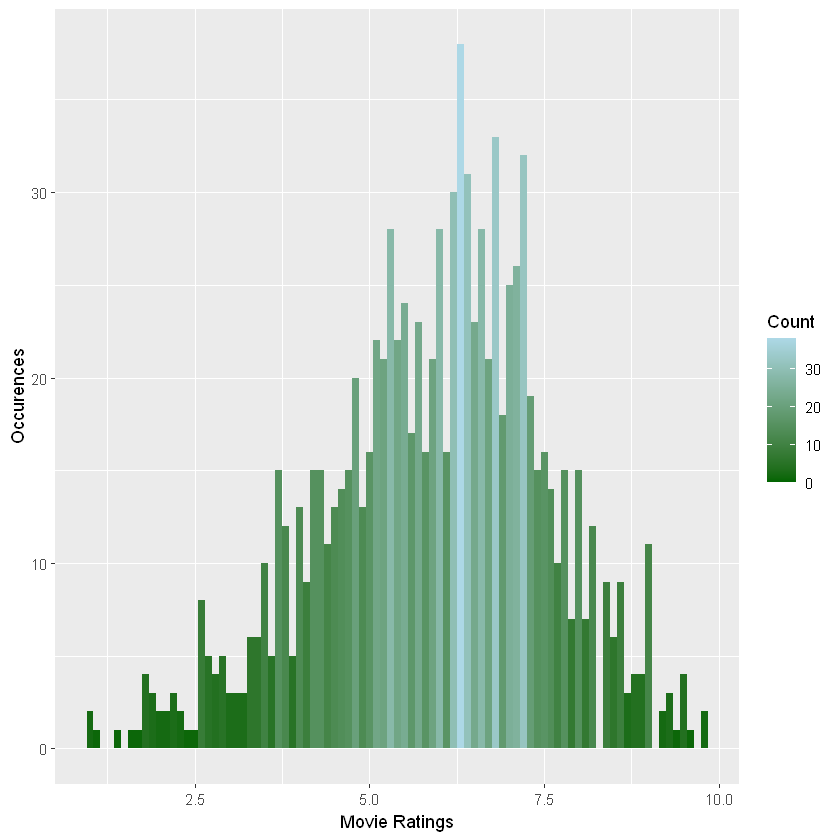

In [23]:
# scale_fill_gradient('Label',low=color1,high=color2)
pl2 + scale_fill_gradient('Count',low='darkgreen',high='lightblue')

### Adding density plot

You can add a [kernel density estimation plot](https://en.wikipedia.org/wiki/Kernel_density_estimation)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


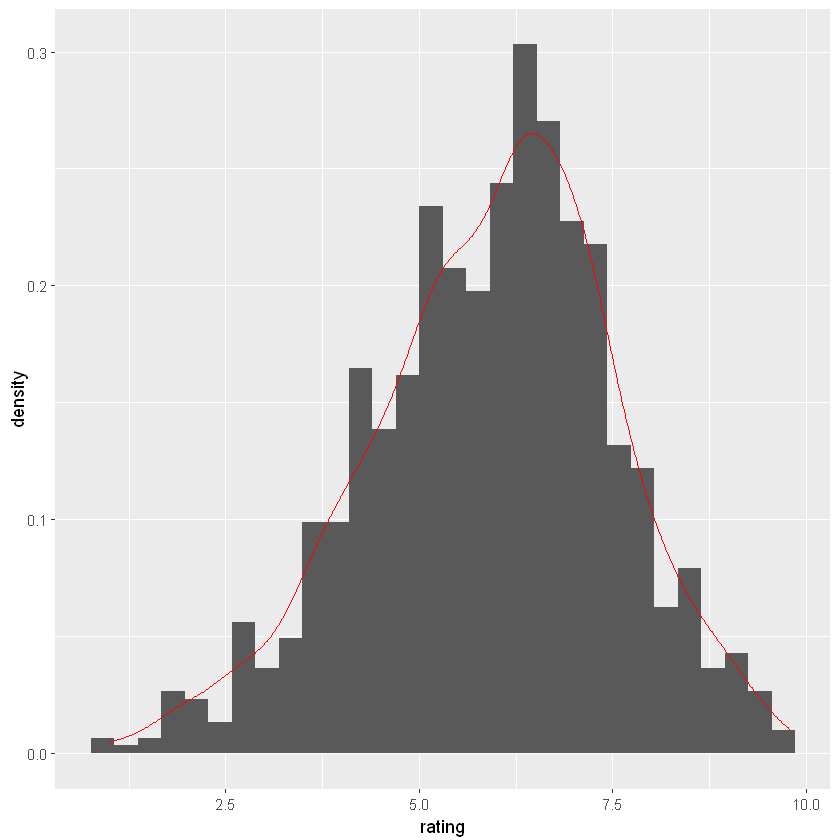

In [25]:
# Adding Labels
pl <- ggplot(df,aes(x=rating))
pl + geom_histogram(aes(y=..density..)) + geom_density(color='red')

## Scatterplots with ggplot2

In [29]:
df <- mtcars
?mtcars

In [28]:
head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


### qplot()

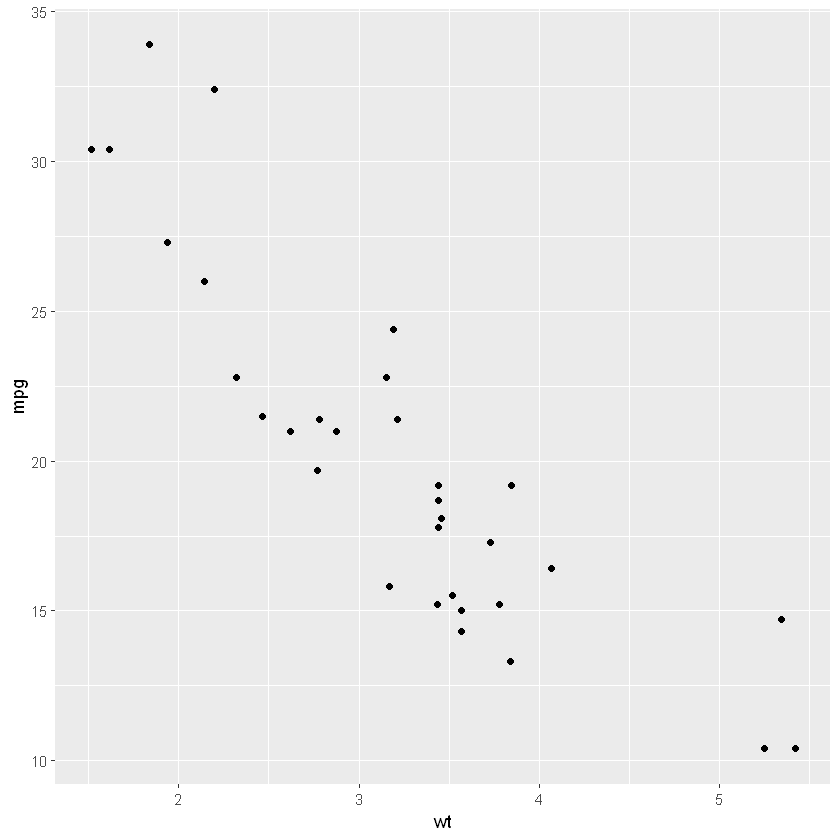

In [29]:
qplot(wt,mpg,data=df)

### Adding a 3rd feature

We can add a third feature by adding a color gradient on each point, or by resizing each point based on their value of this 3rd feature. For example:

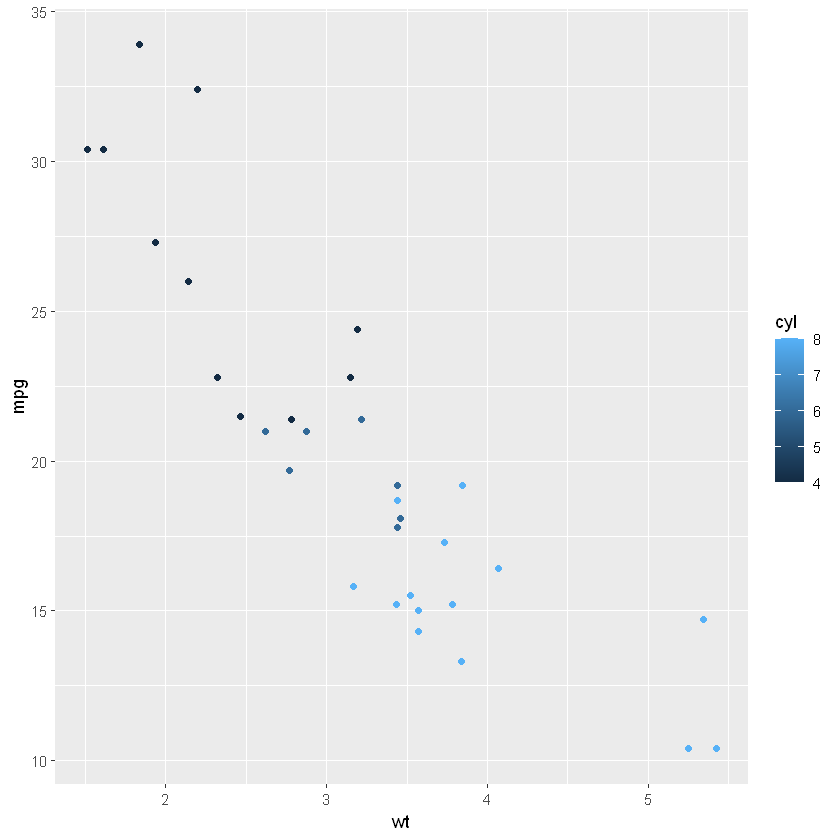

In [30]:
qplot(wt,mpg,data=df,color=cyl)

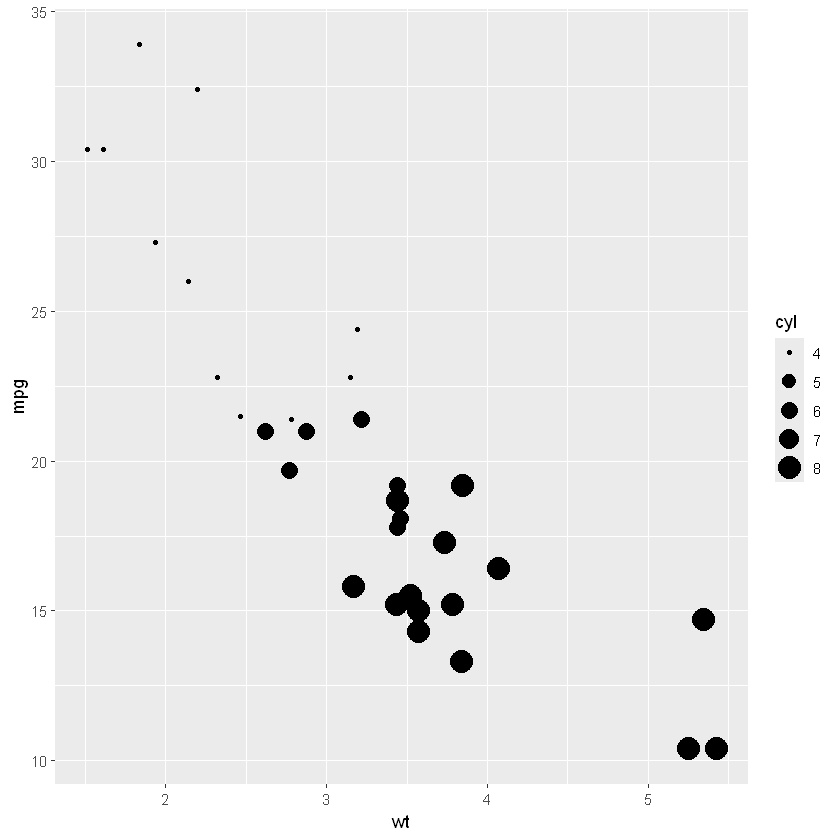

In [31]:
qplot(wt,mpg,data=df,size=cyl)

### Or both

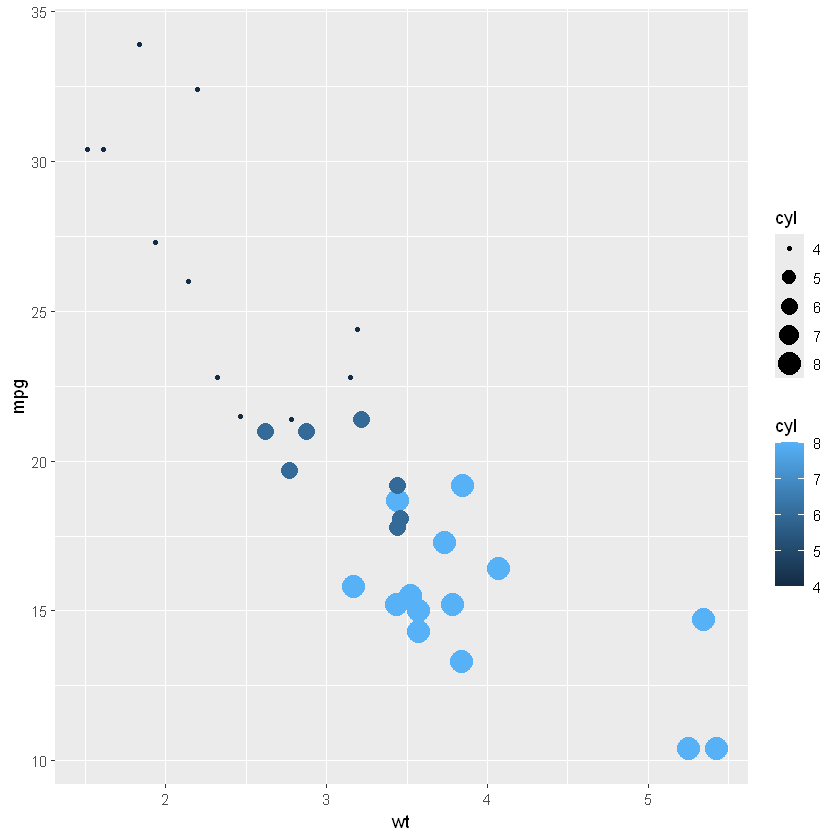

In [32]:
qplot(wt,mpg,data=df,size=cyl,color=cyl)

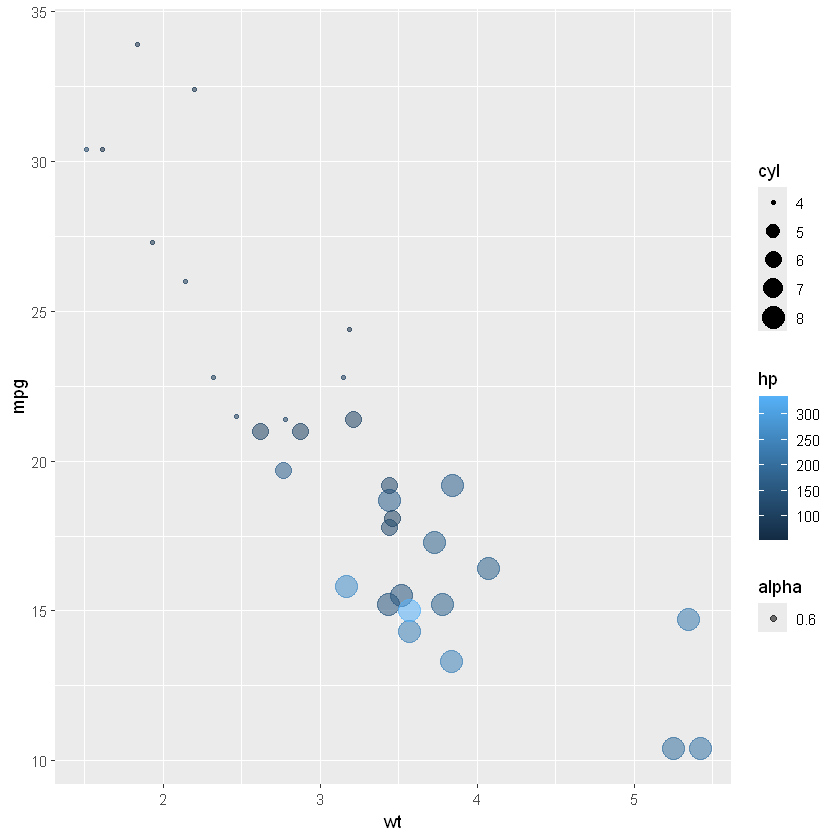

In [33]:
# Show 4 features (this gets messy)
qplot(wt,mpg,data=df,size=cyl,color=hp,alpha=0.6)

## Using ggplot()

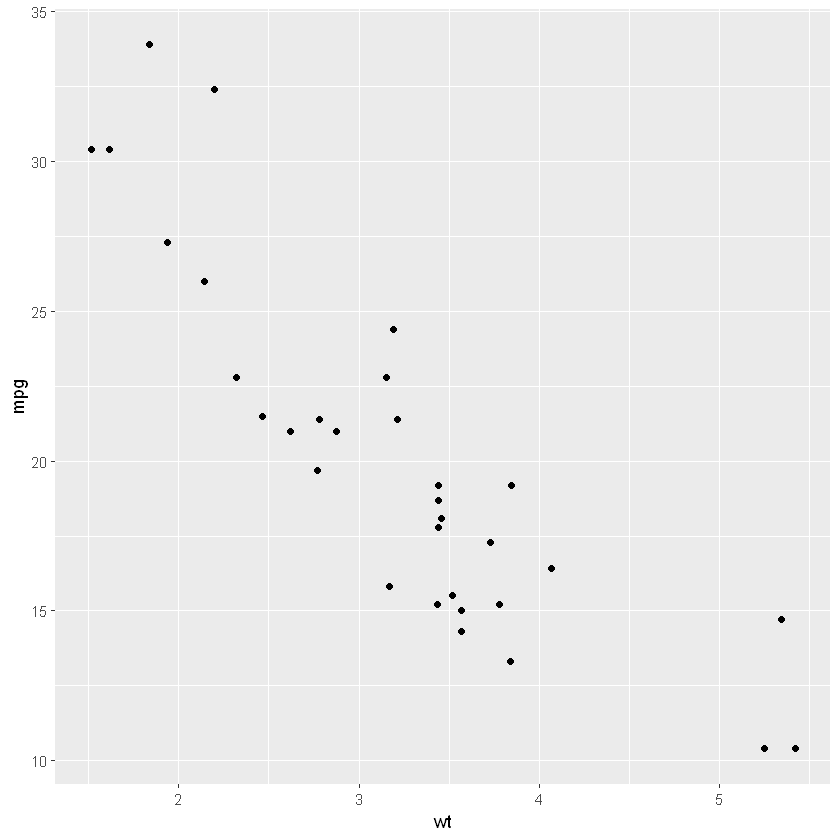

In [34]:
pl <- ggplot(data=df,aes(x = wt,y=mpg)) 
pl + geom_point()

### Adding 3rd feature

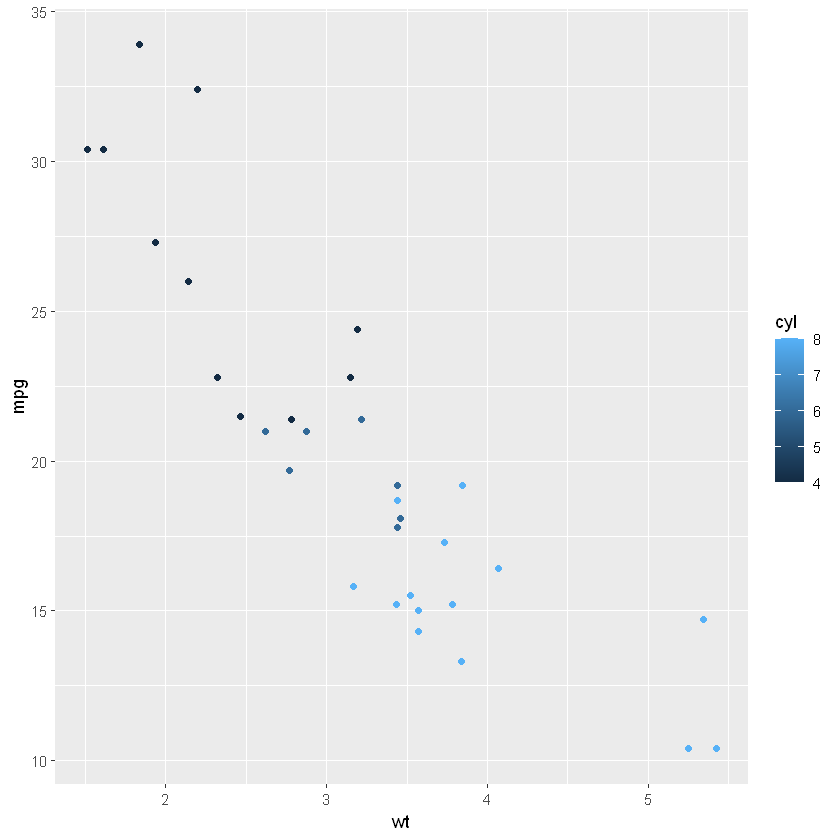

In [35]:
pl <- ggplot(data=df,aes(x = wt,y=mpg)) 
pl + geom_point(aes(color=cyl))

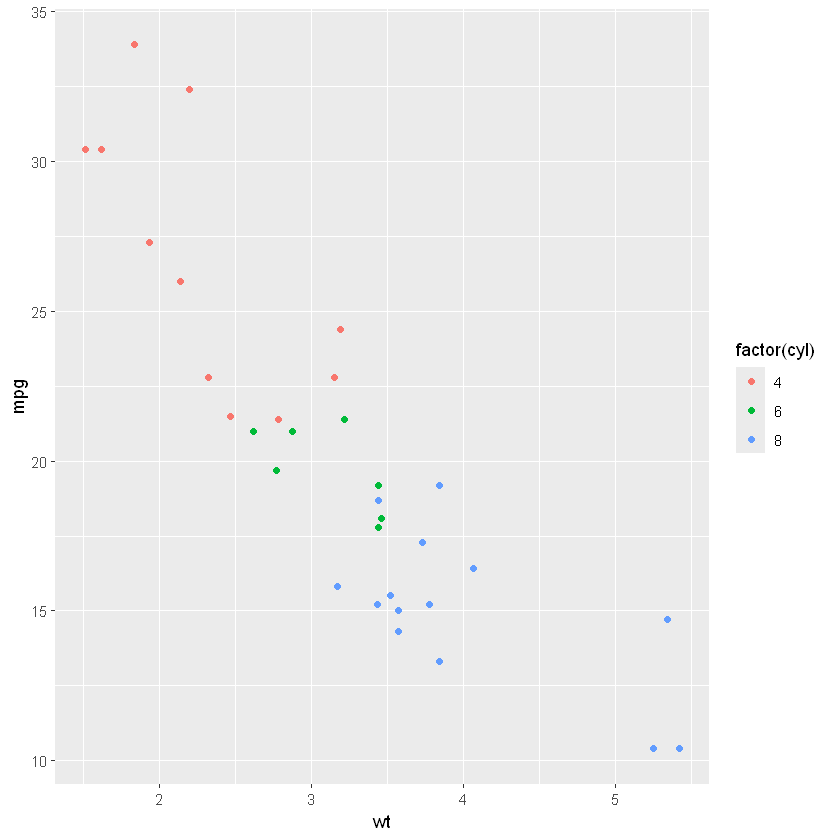

In [36]:
pl <- ggplot(data=df,aes(x = wt,y=mpg))

pl + geom_point(aes(color=factor(cyl)))

Warning message:
"Using size for a discrete variable is not advised."


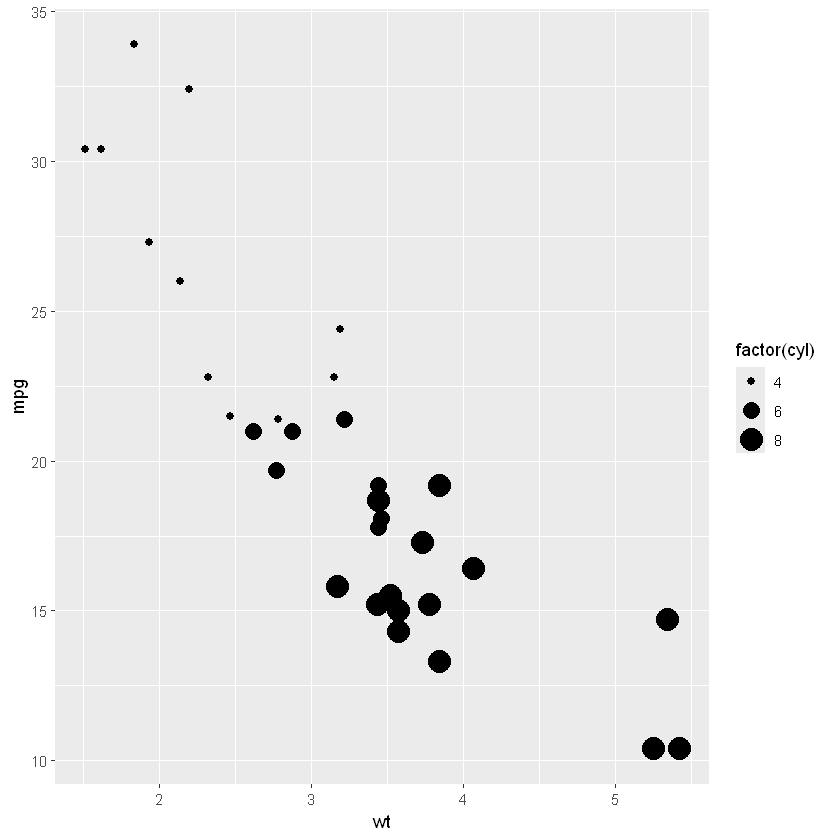

In [37]:
pl <- ggplot(data=df,aes(x = wt,y=mpg))

pl + geom_point(aes(size=factor(cyl)))

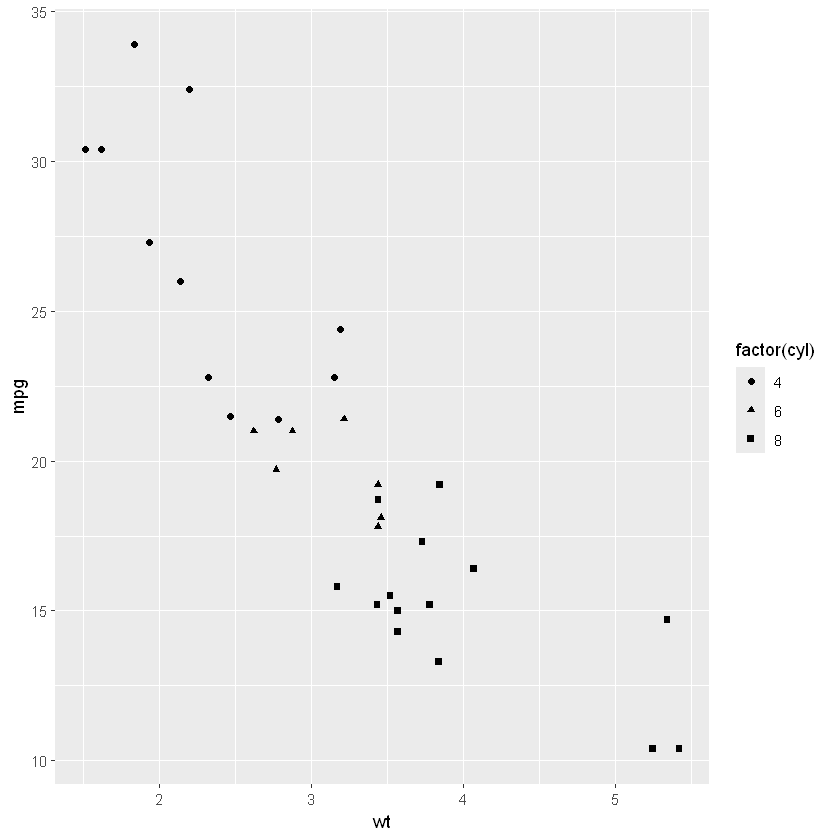

In [38]:
# With Shapes
pl <- ggplot(data=df,aes(x = wt,y=mpg))

pl + geom_point(aes(shape=factor(cyl)))

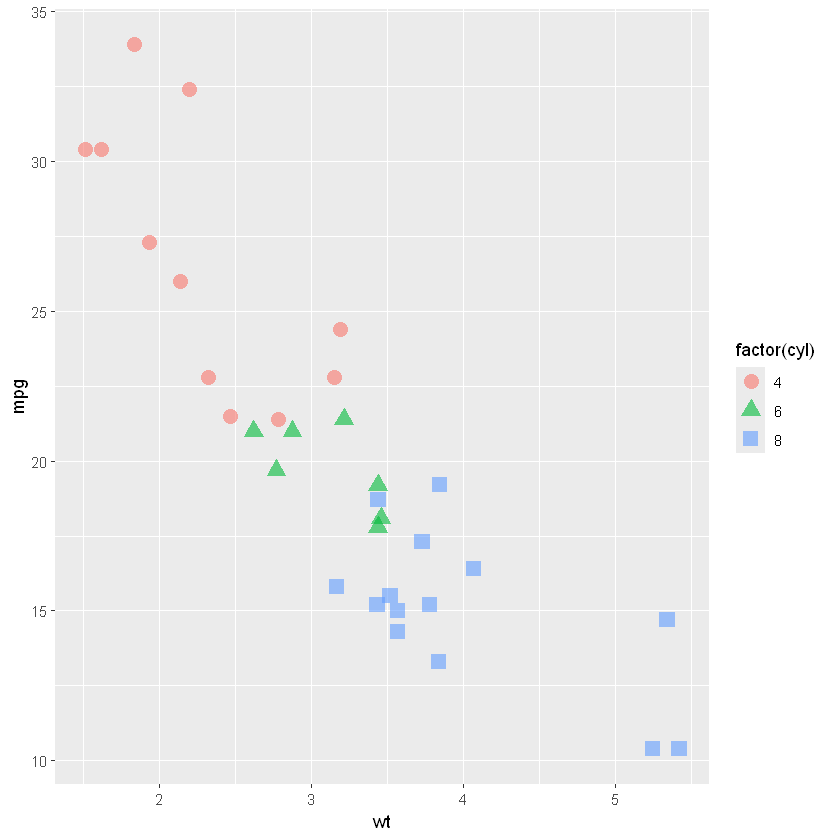

In [39]:
# Better version
# With Shapes
pl <- ggplot(data=df,aes(x = wt,y=mpg))

pl + geom_point(aes(shape=factor(cyl),color=factor(cyl)),size=4,alpha=0.6)

### Gradient Scales

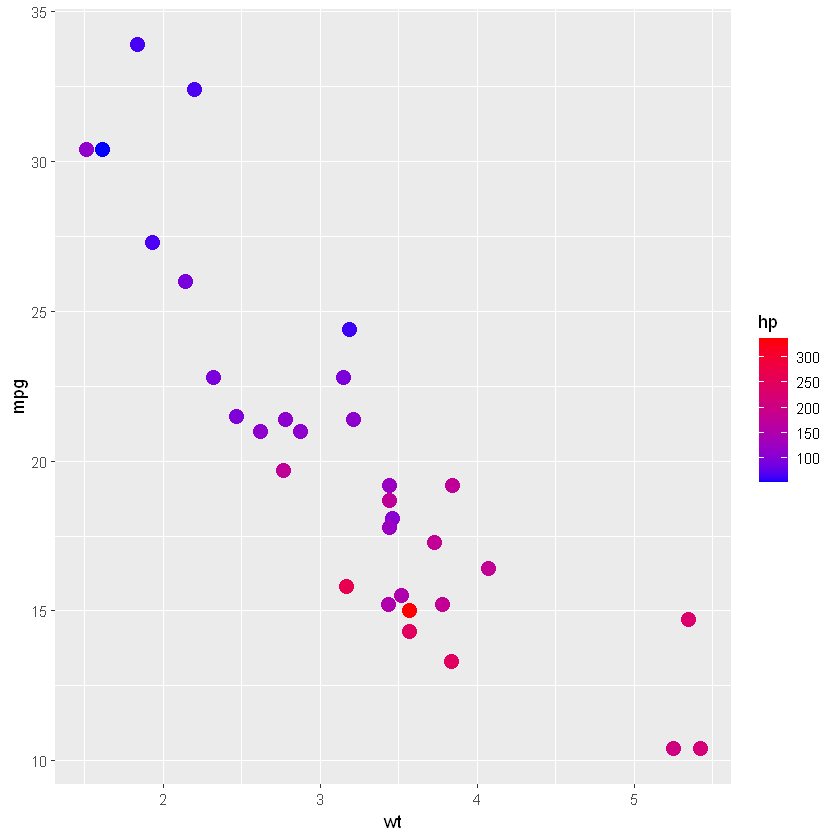

In [40]:
pl + geom_point(aes(colour = hp),size=4) + scale_colour_gradient(high='red',low = "blue")

## Barplots with ggplot2

Barplots are a useful way of displaying occurence counts when a histogram isn't quite what you're looking for! In ggplot2, there are two types of bar charts, determined by what is mapped to bar height. By default, geom_bar uses stat="count" which makes the height of the bar proportion to the number of cases in each group (or if the weight aethetic is supplied, the sum of the weights). If you want the heights of the bars to represent values in the data, use stat="identity" and map a variable to the y aesthetic.

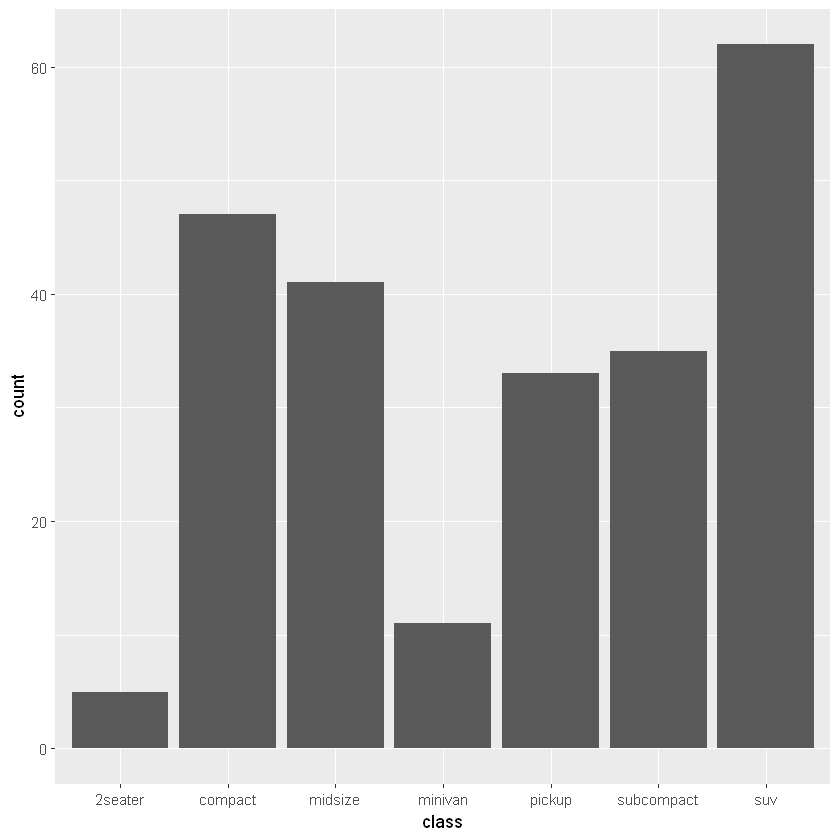

In [41]:
# counts (or sums of weights)
g <- ggplot(mpg, aes(class))
# Number of cars in each class:
g + geom_bar()

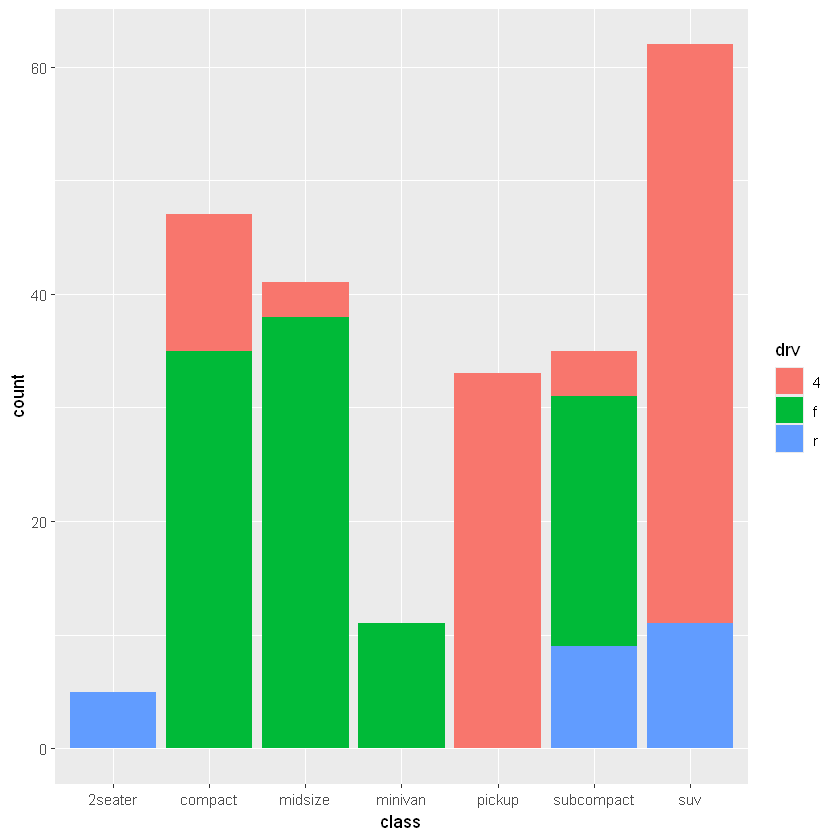

In [42]:
# Bar charts are automatically stacked when multiple bars are placed
# at the same location
g + geom_bar(aes(fill = drv))

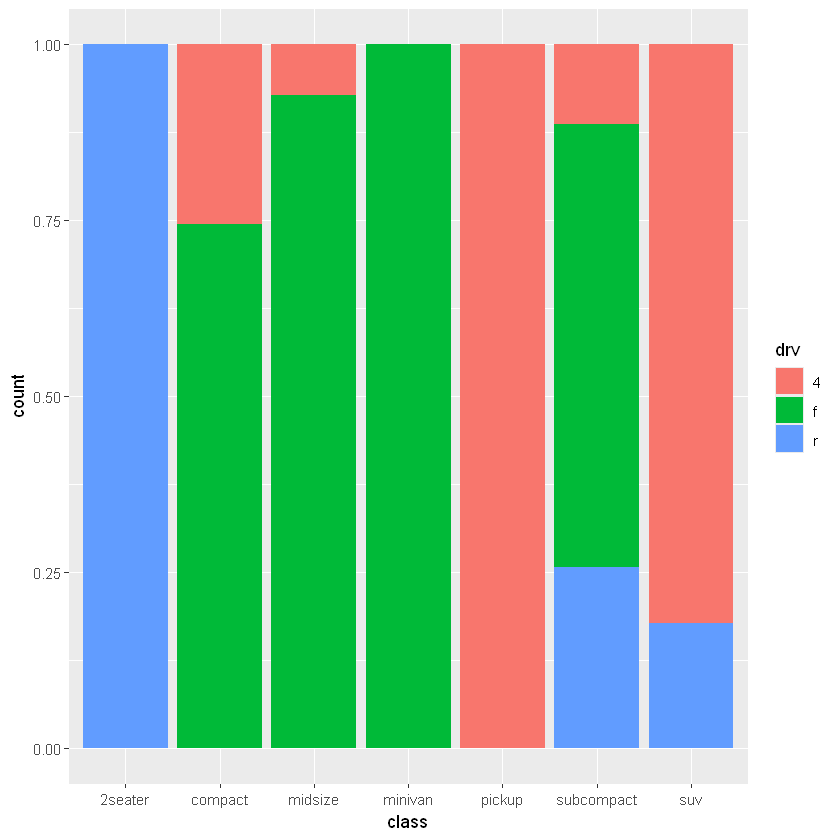

In [43]:
g + geom_bar(aes(fill = drv), position = "fill")

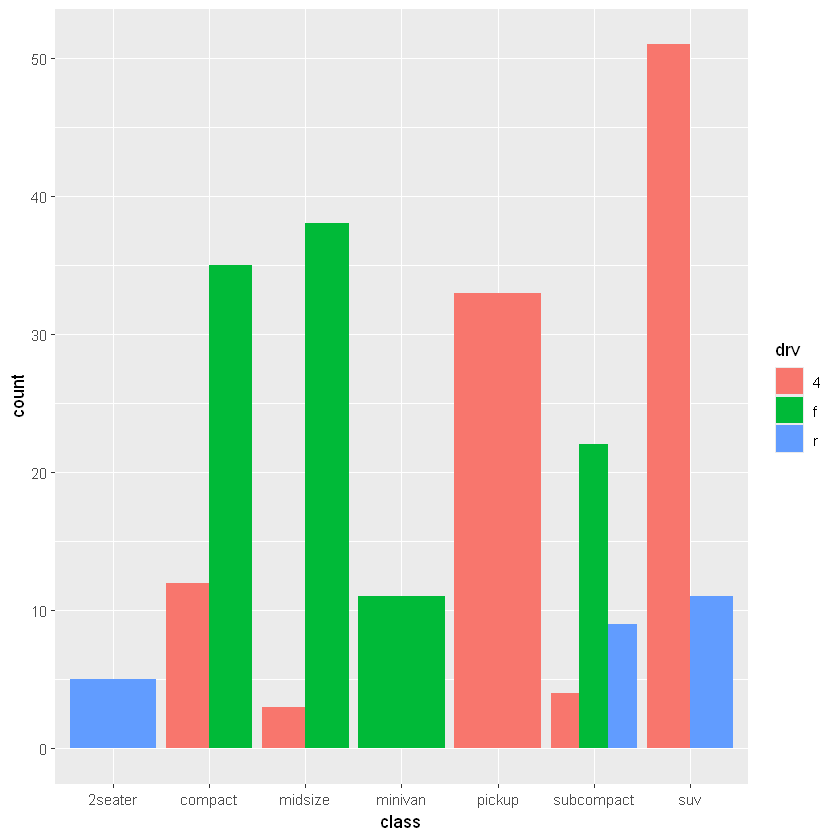

In [44]:
# You can instead dodge, or fill them
g + geom_bar(aes(fill = drv), position = "dodge")

## Boxplots with ggplot2

Boxplots are convenient way of graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

In [45]:
df <- mtcars

In [46]:
head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


### qplot()

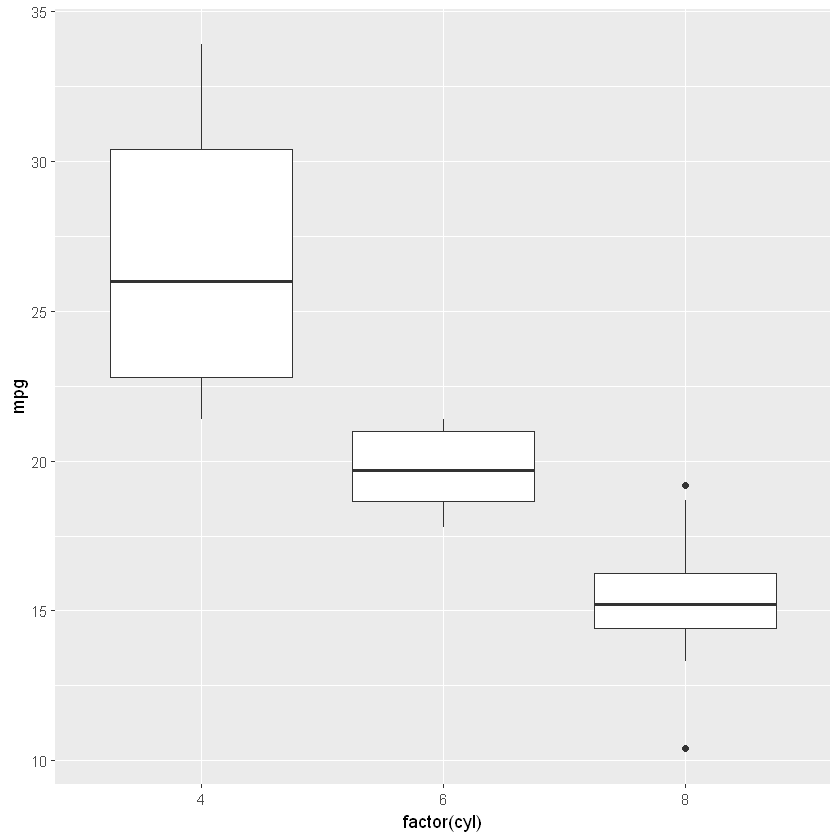

In [47]:
qplot(factor(cyl), mpg, data = mtcars, geom = "boxplot")

### using ggplot

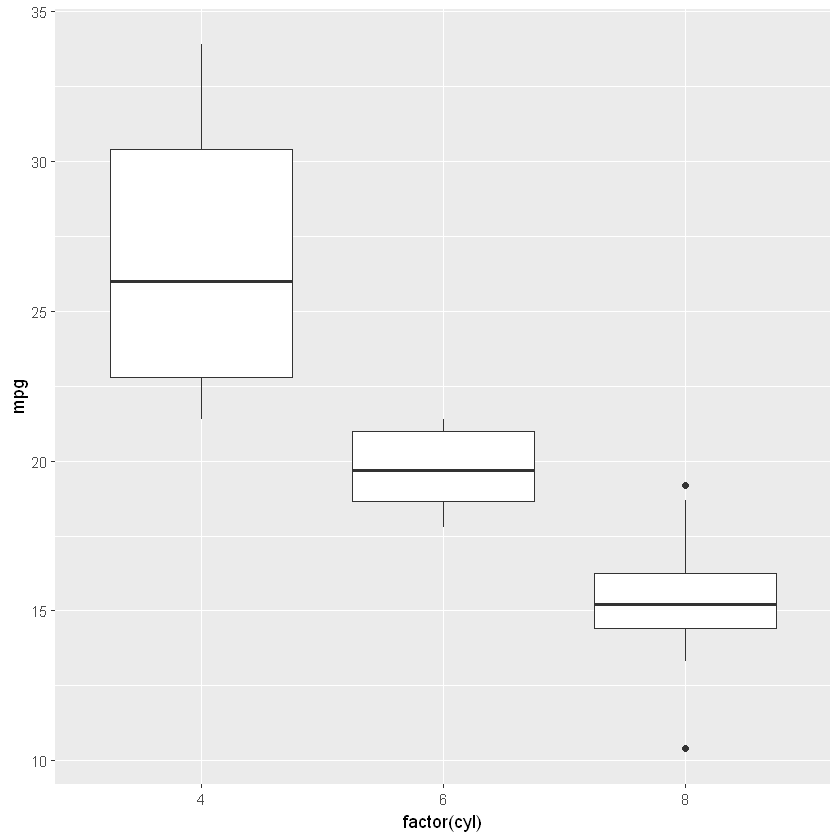

In [48]:
pl <- ggplot(mtcars, aes(factor(cyl), mpg))

pl + geom_boxplot()

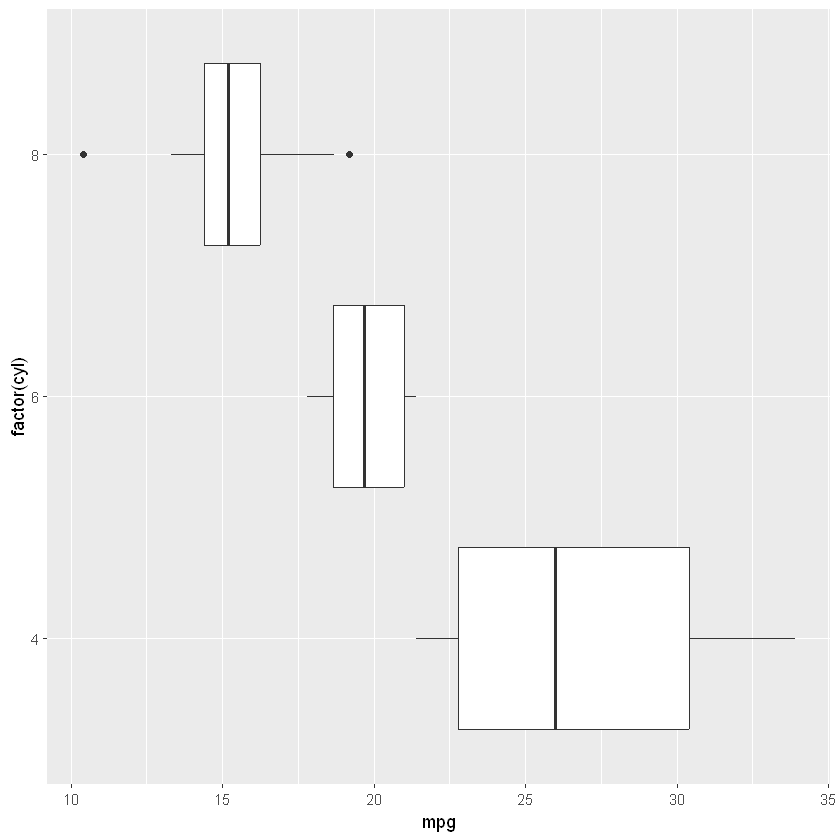

In [49]:
pl + geom_boxplot() + coord_flip()

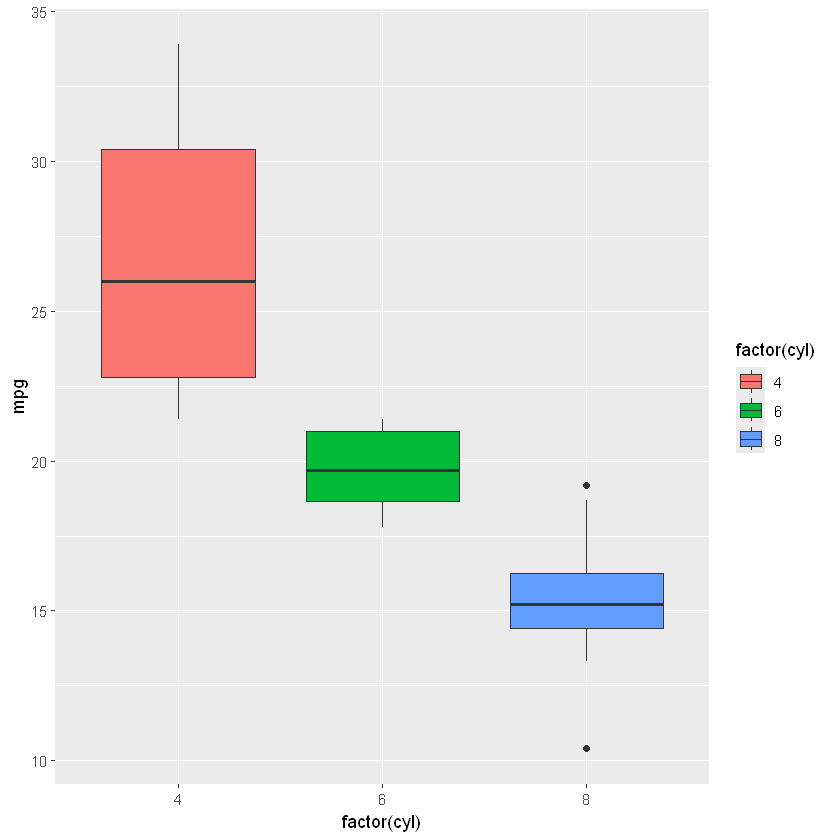

In [50]:
pl + geom_boxplot(aes(fill = factor(cyl)))

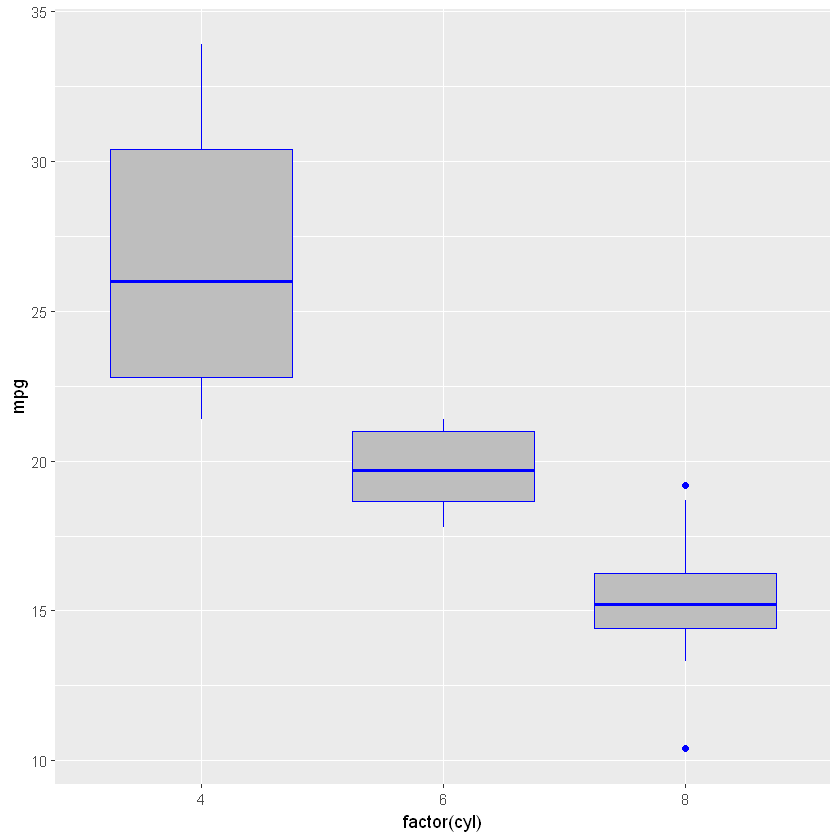

In [51]:
pl + geom_boxplot(fill = "grey", color = "blue")

## Violin Plot

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


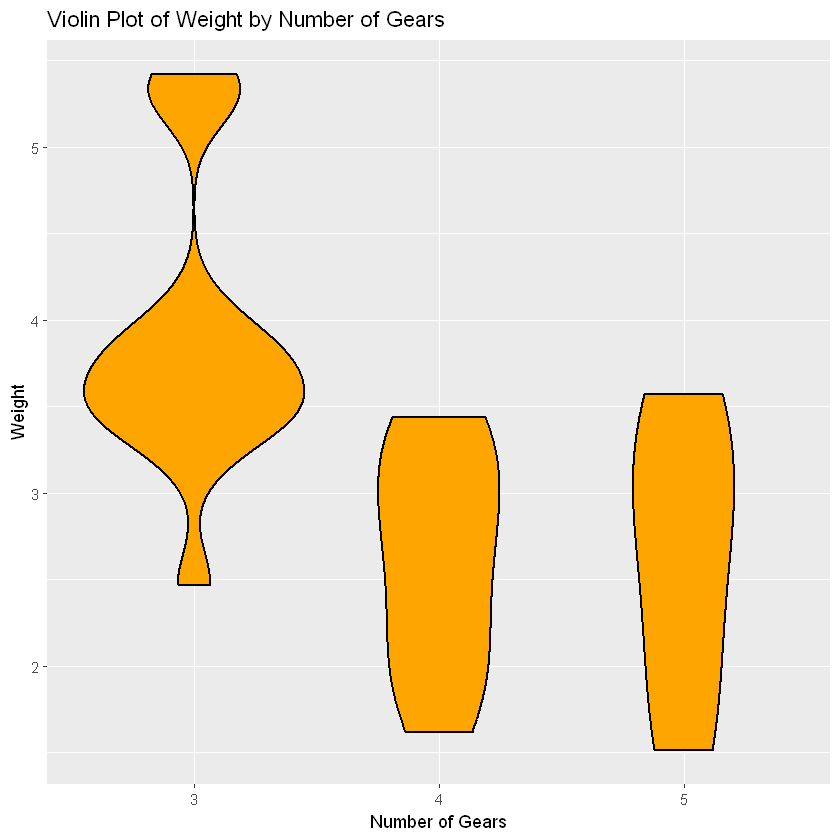

In [57]:
ggplot(data = mtcars, aes(x = factor(gear), y = wt)) +
  geom_violin(fill = "orange", color="black", size=0.8) +
  labs(title = "Violin Plot of Weight by Number of Gears", x = "Number of Gears", y = "Weight")

## 2 Variable Plotting with ggplot2

In [58]:
df <- movies

### qplot()

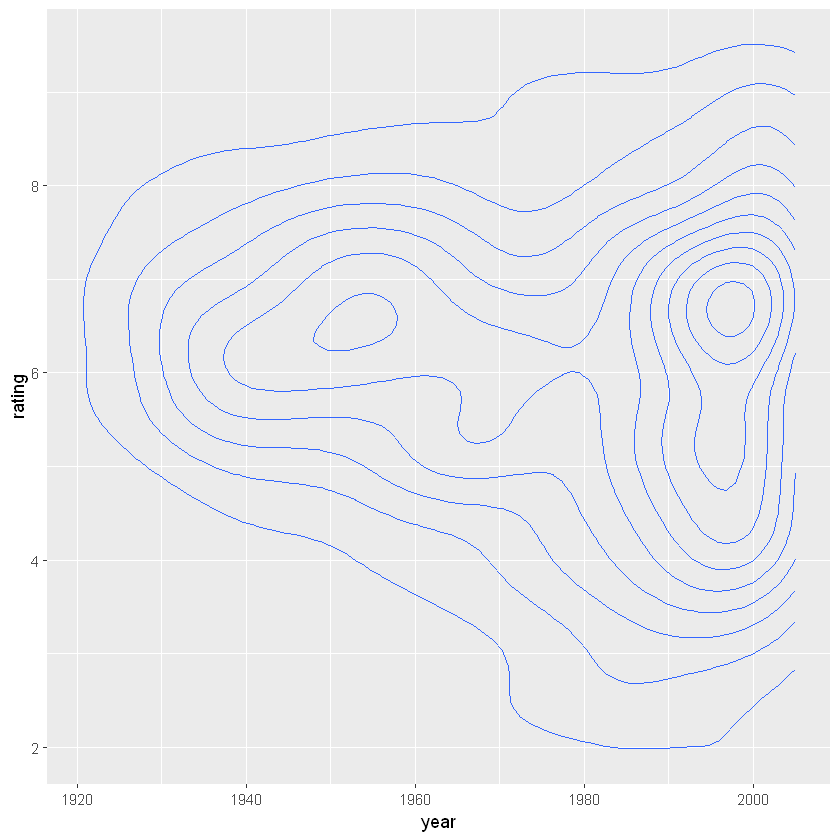

In [59]:
qplot(x=year, y=rating, data = df, geom = "density2d")

### 2d Bin Chart

In [33]:
pl <- ggplot(movies,aes(x = year,y=rating))

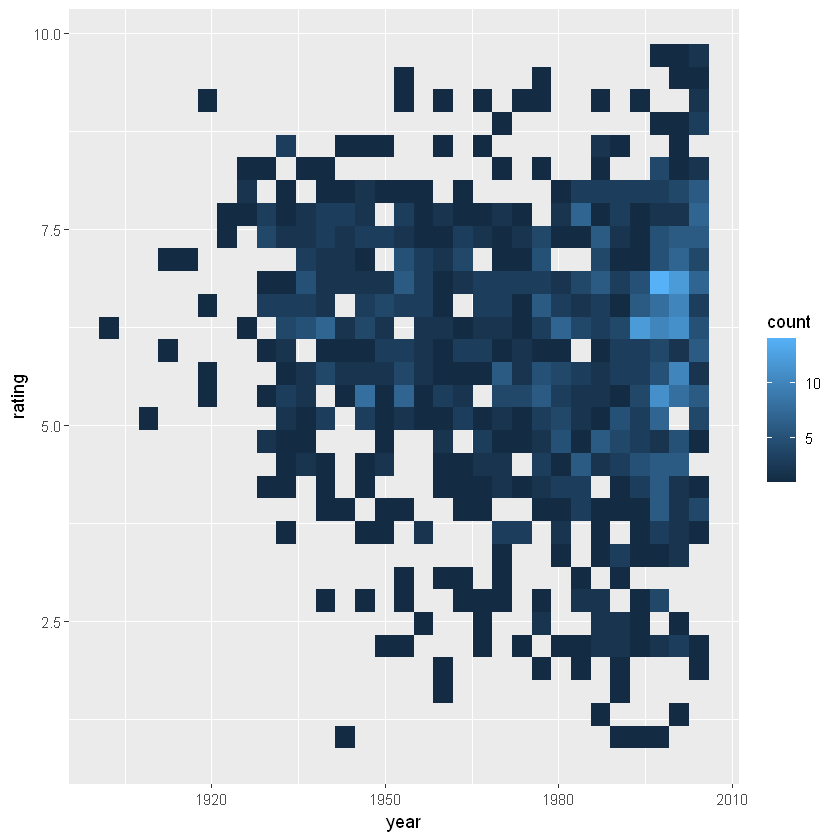

In [38]:
pl + geom_bin2d()

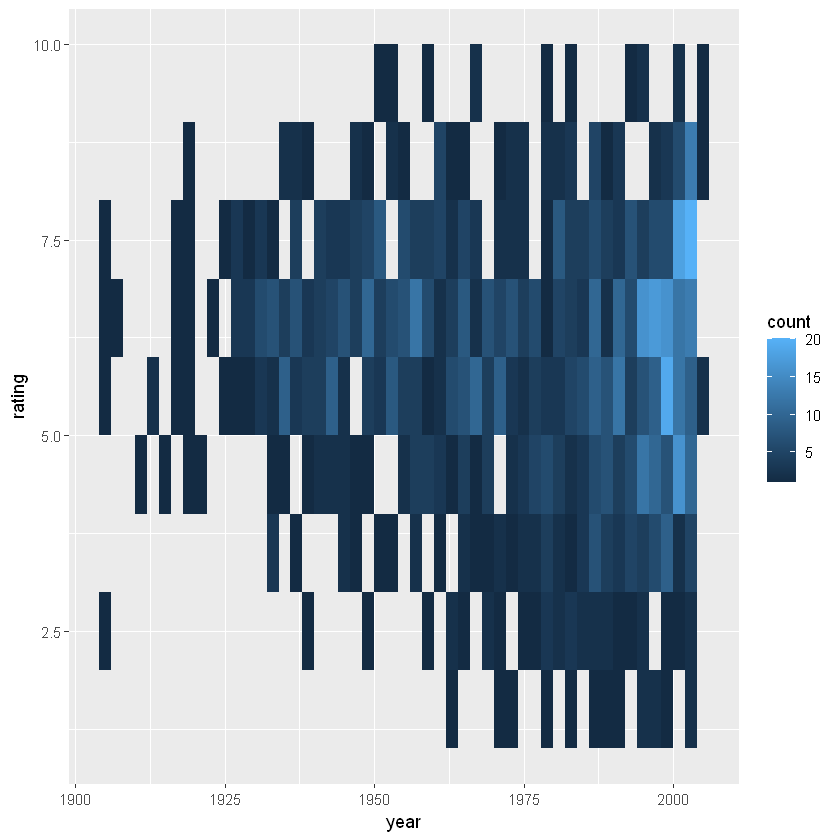

In [64]:
# Control bin sizes
pl + geom_bin2d(binwidth=c(2,1))

### 2d Density Plot

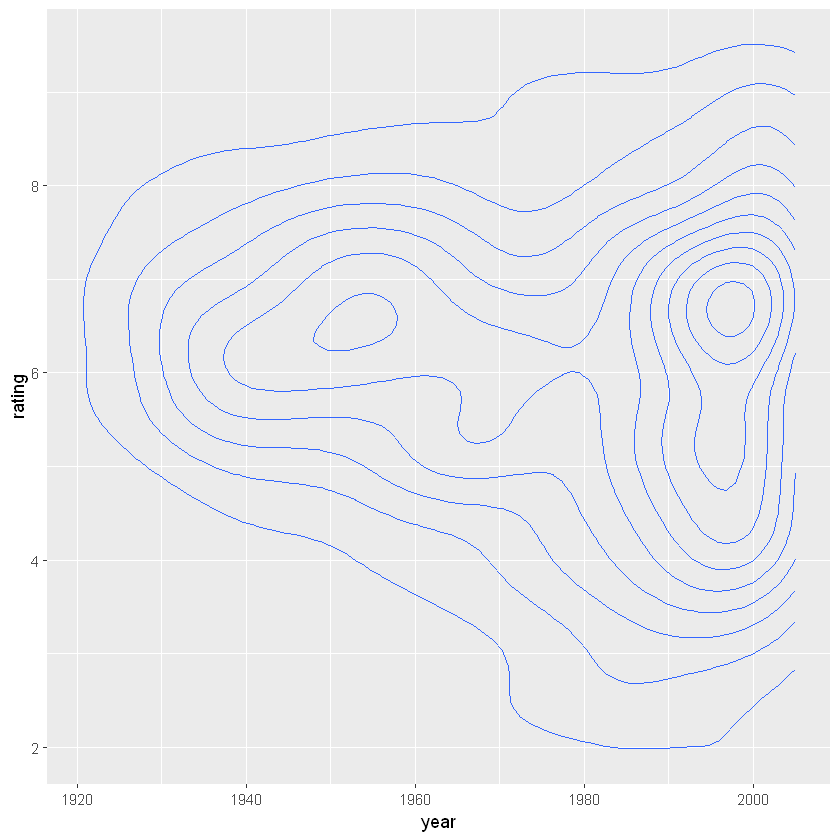

In [65]:
pl + geom_density2d()

### 2d Hex Plot

In [67]:
install.packages('hexbin')

Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'hexbin' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpS0C3wU\downloaded_packages


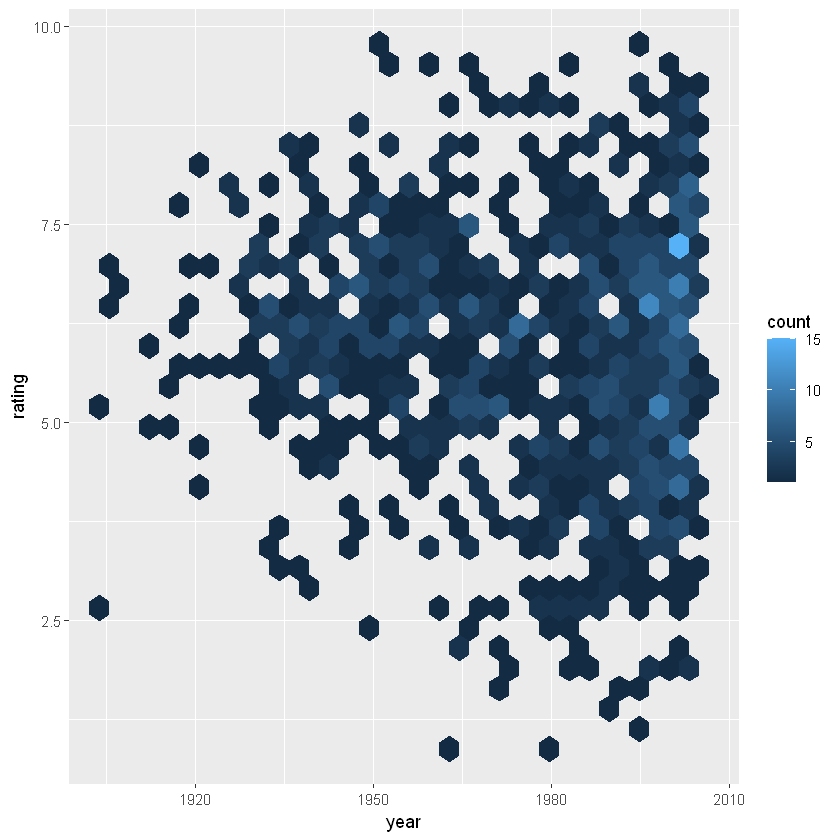

In [68]:
pl + geom_hex()

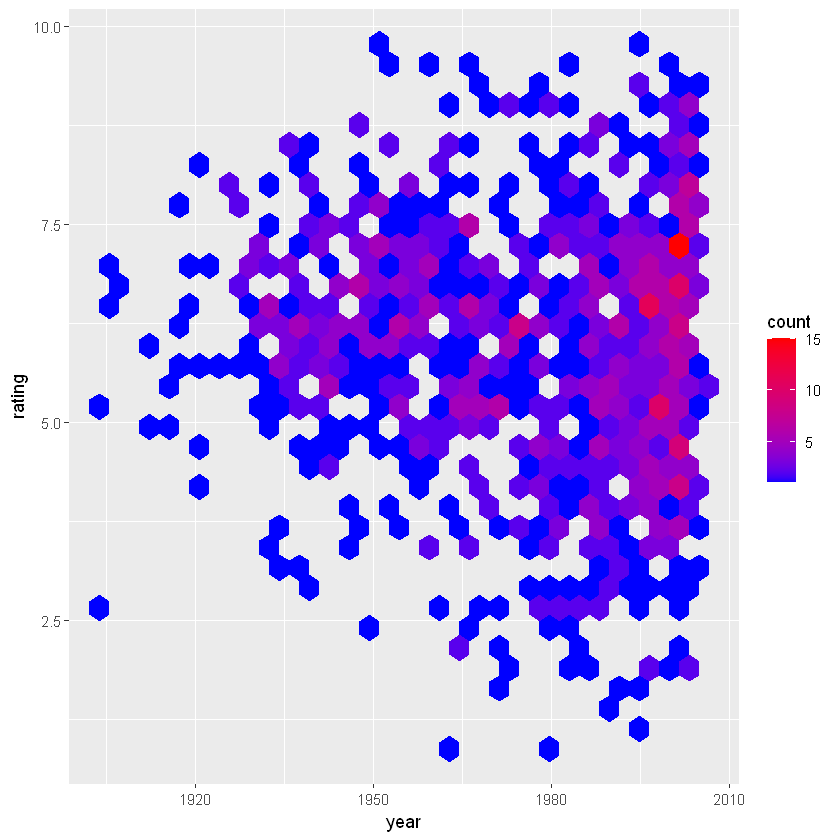

In [69]:
pl + geom_hex() + scale_fill_gradient(high='red',low='blue')

## Coordinates and Faceting with ggplot2

Learning how to deal with coordinates will allow us to size our plots correctly. Faceting will allow us to place several plots next to each other, these plots are usually related by the same dataset.

### Basic Plot and Data

In [70]:
pl <- ggplot(mpg,aes(x=displ,y=hwy)) + geom_point()

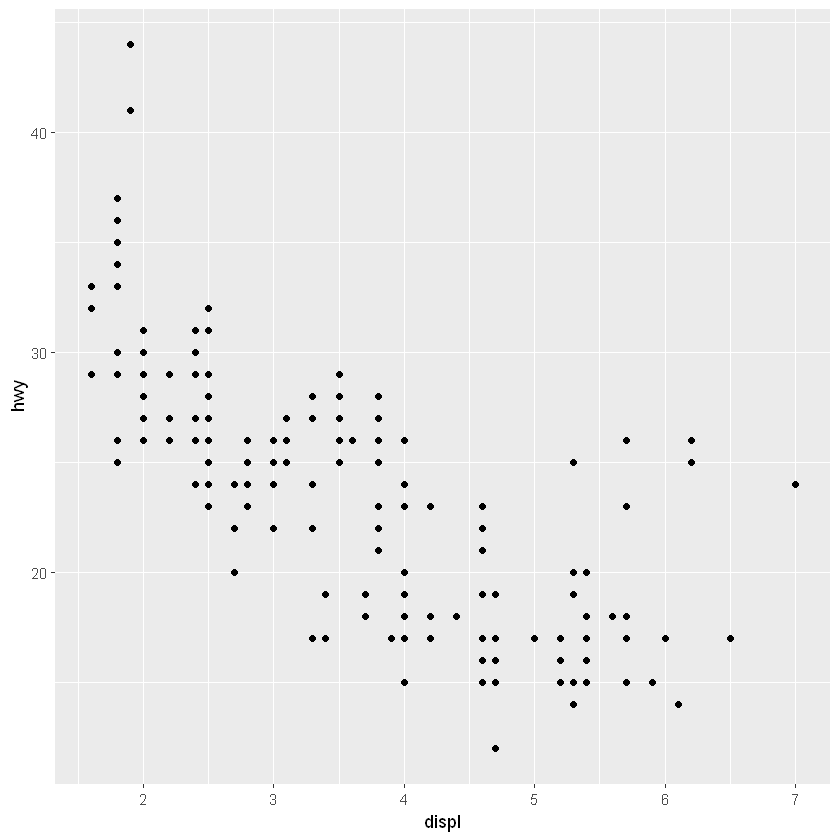

In [71]:
pl

### Setting x and y limits

You can use + scale_x_continuous and scale_y_continuous with an additional limits=c(low,high) argument to set the scale. A sometimes nicer way to do this is by adding + coord_cartesian() with xlim and ylim arguments and pass in numeric vectors. For example:

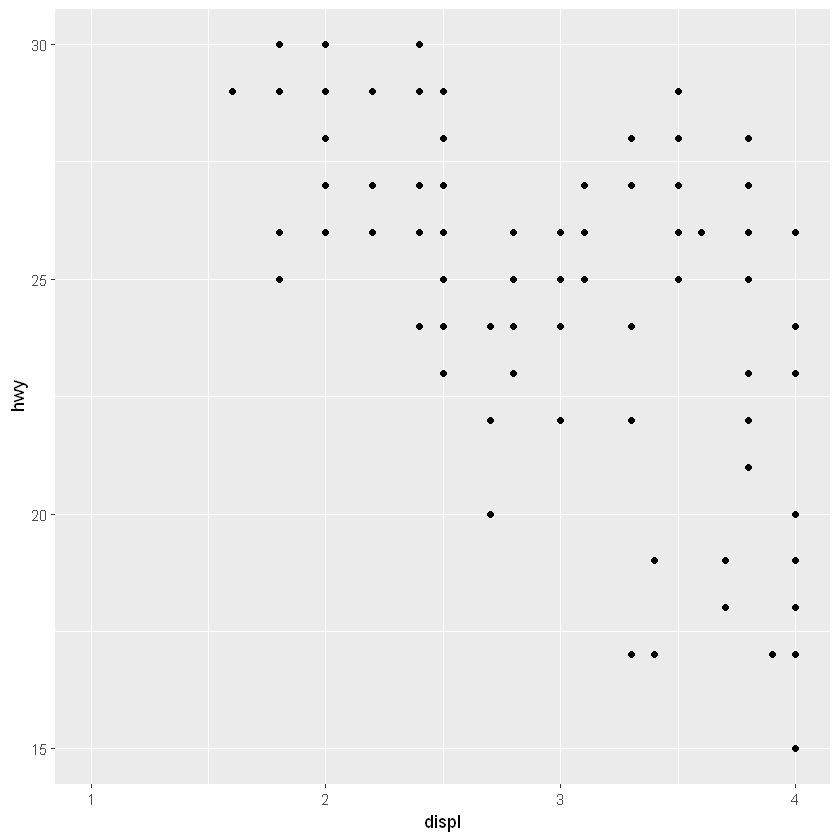

In [72]:
pl + coord_cartesian(xlim=c(1,4),ylim=c(15,30))

### Aspect Ratios

You can use the coord_fixed() method to change the aspect ratio of a plot (default is 1:1). For example:

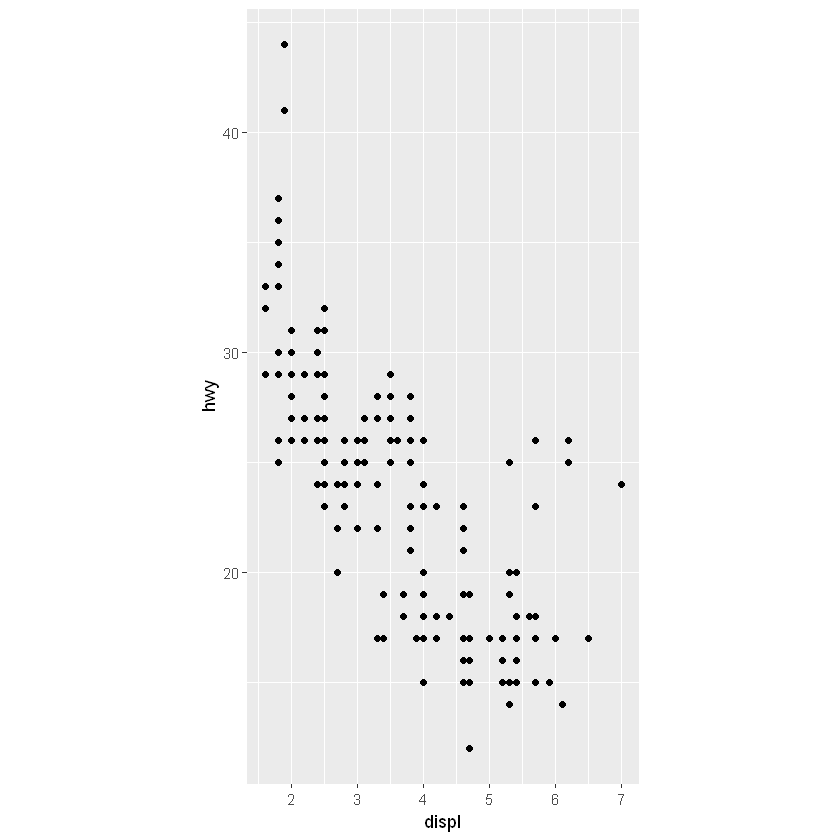

In [74]:
# aspect ratio, expressed as y / x
pl + coord_fixed(ratio = 1/3)

## Facets
for further reading please check http://docs.ggplot2.org/current/facet_grid.html

The best way to set up a facet grid (multiple plots) is to use facet_grid(), the main part of this function is the use of the facet argument:

In [75]:
help(facet_grid)

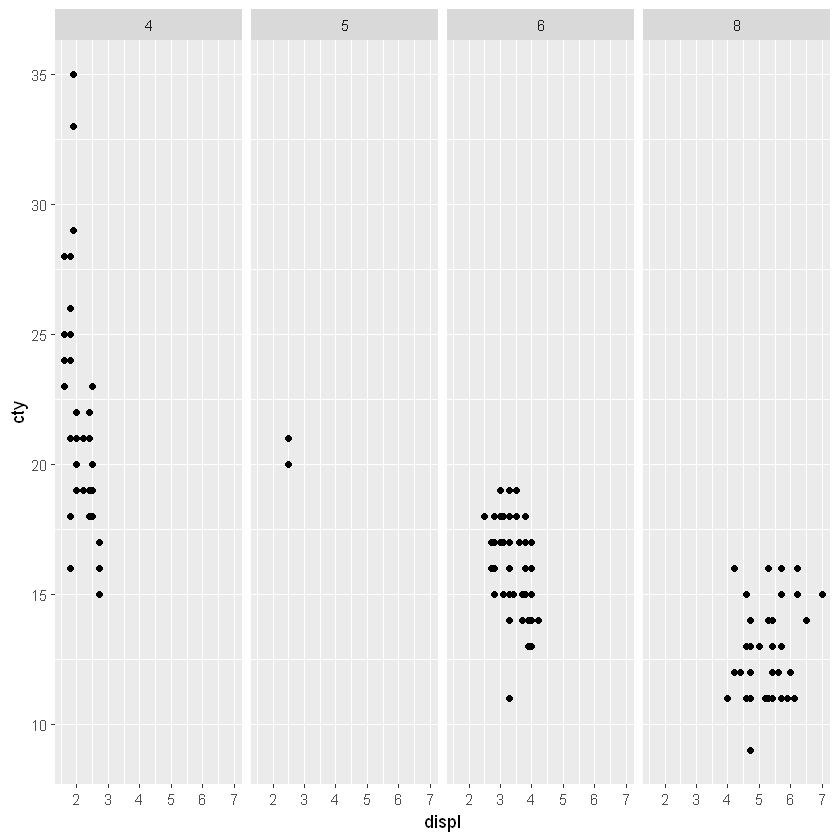

In [76]:
p <- ggplot(mpg, aes(displ, cty)) + geom_point()

p + facet_grid(. ~ cyl)

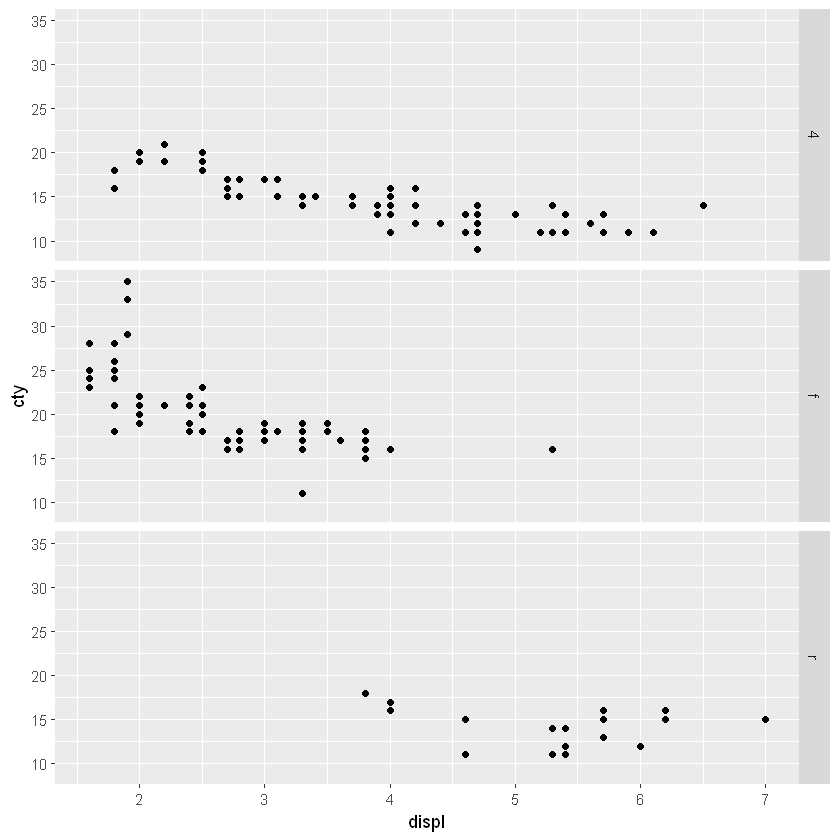

In [77]:
p + facet_grid(drv ~ .)

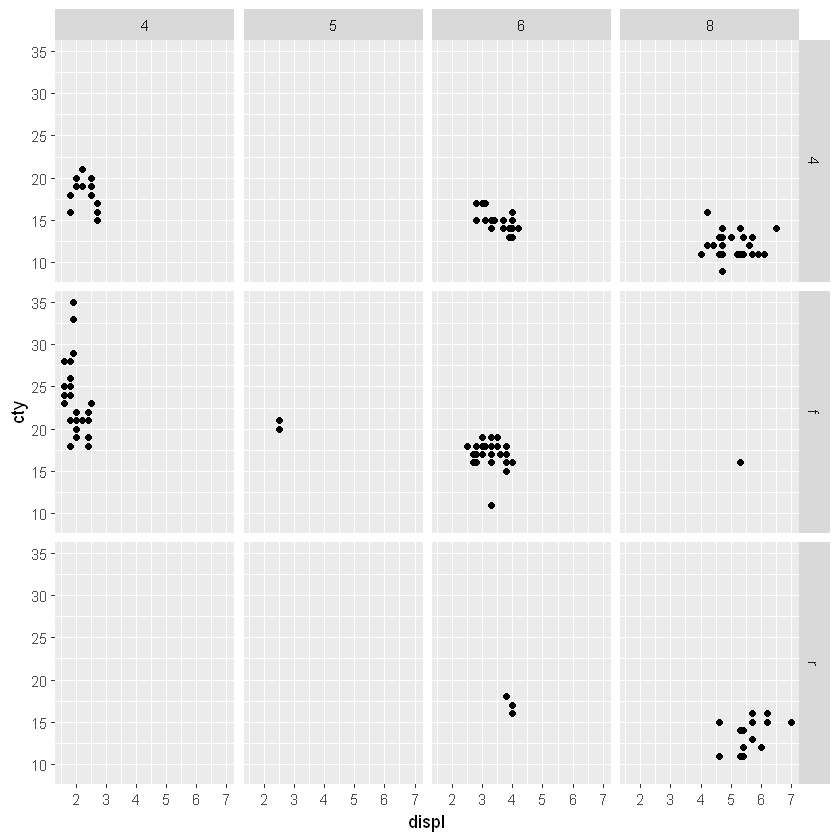

In [78]:
p + facet_grid(drv ~ cyl)

## ggthemes

Here's a link to the [documentation for ggthemes](https://cran.r-project.org/web/packages/ggthemes/vignettes/ggthemes.html). Let's see just a few examples:

In [81]:
install.packages('ggthemes')

Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpS0C3wU\downloaded_packages


In [82]:
library(ggthemes)

Warning message:
"package 'ggthemes' was built under R version 4.4.2"


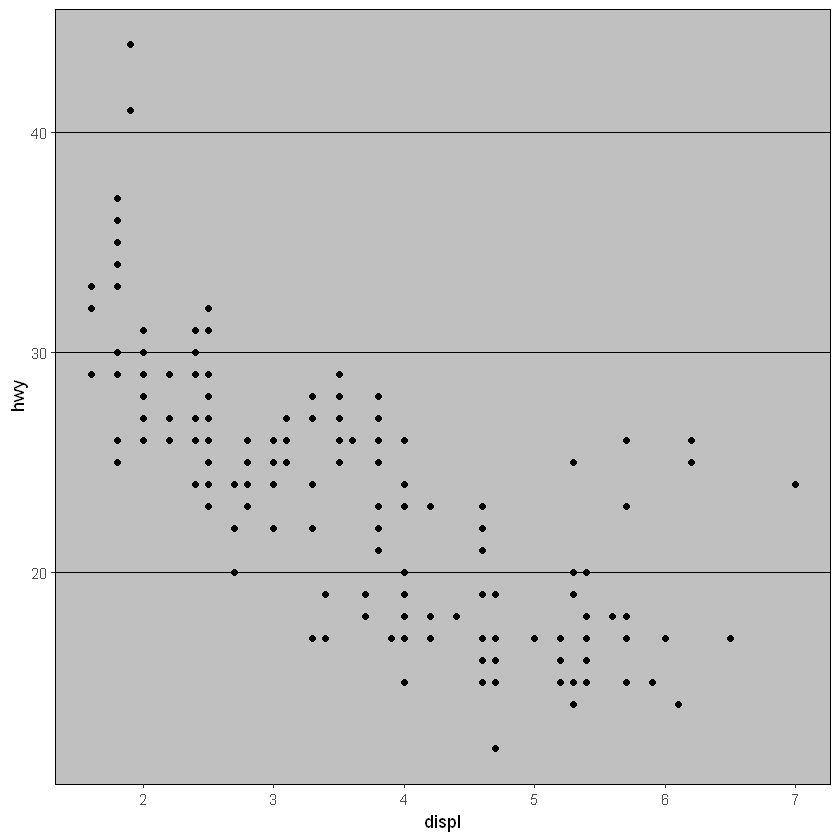

In [83]:
pl + theme_excel()

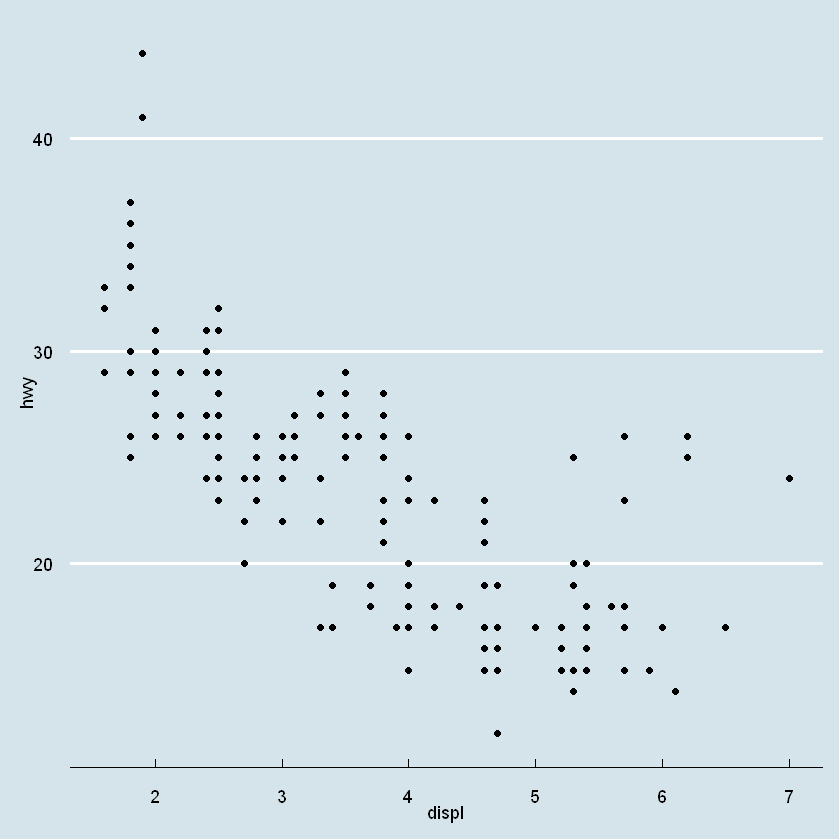

In [85]:
pl + theme_economist()

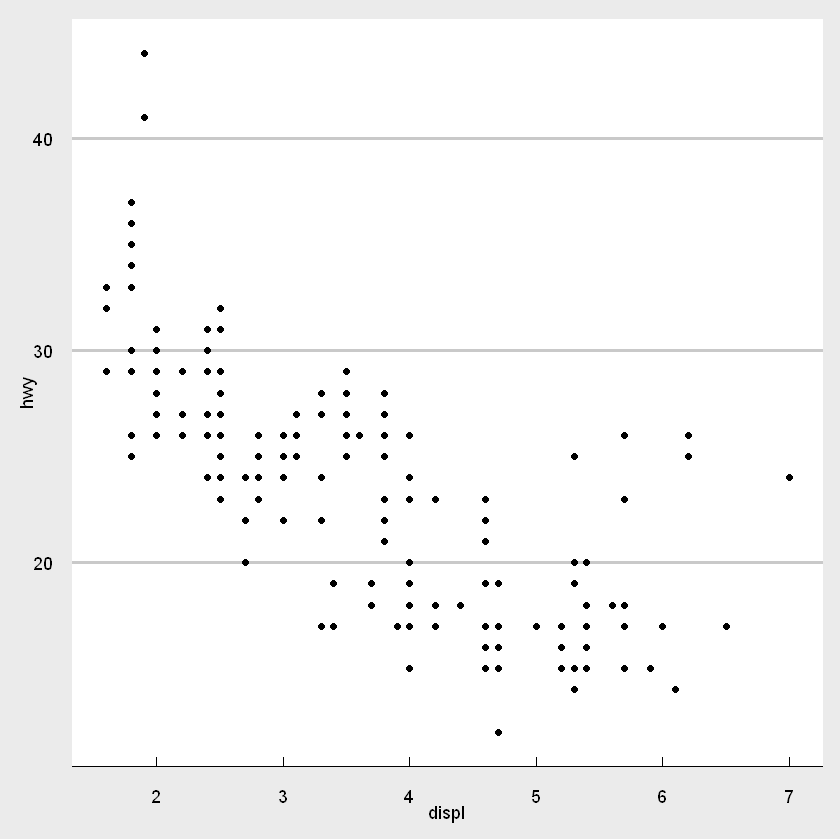

In [86]:
pl + theme_economist_white()

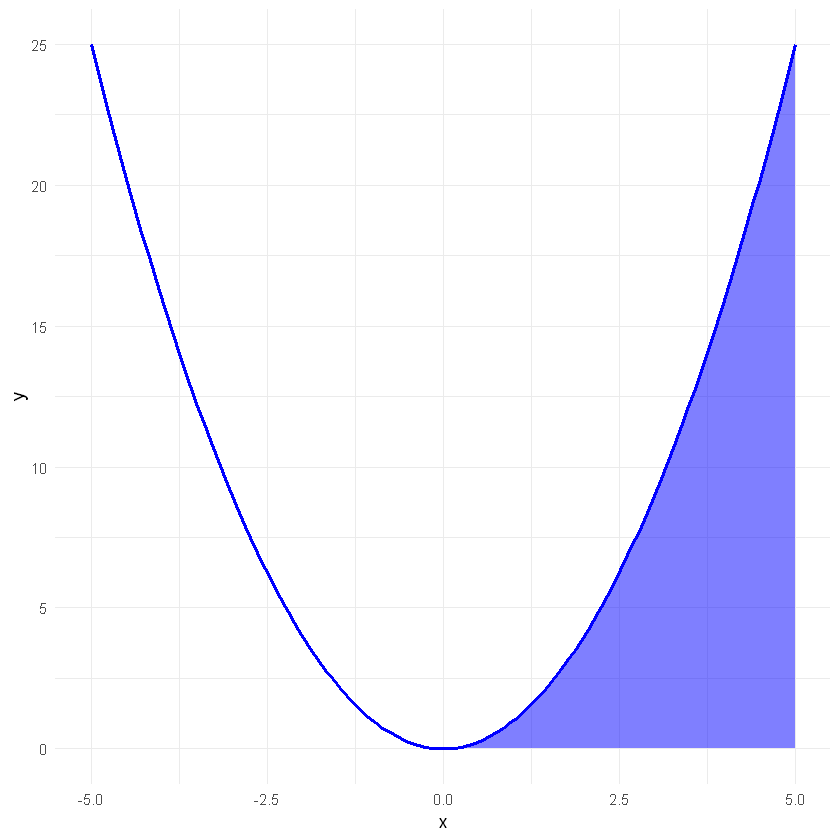

In [87]:
data <- data.frame(
  x = seq(-5, 5, length.out = 100),
  y = seq(-5, 5, length.out = 100)^2
)

ggplot(data, aes(x = x, y = y)) +
  geom_line(color = "blue", linewidth = 1) +
  geom_ribbon(aes(ymin = 0, ymax = y), fill = "blue", alpha = 0.5,
              data = subset(data, x > 0)) +
  theme_minimal()

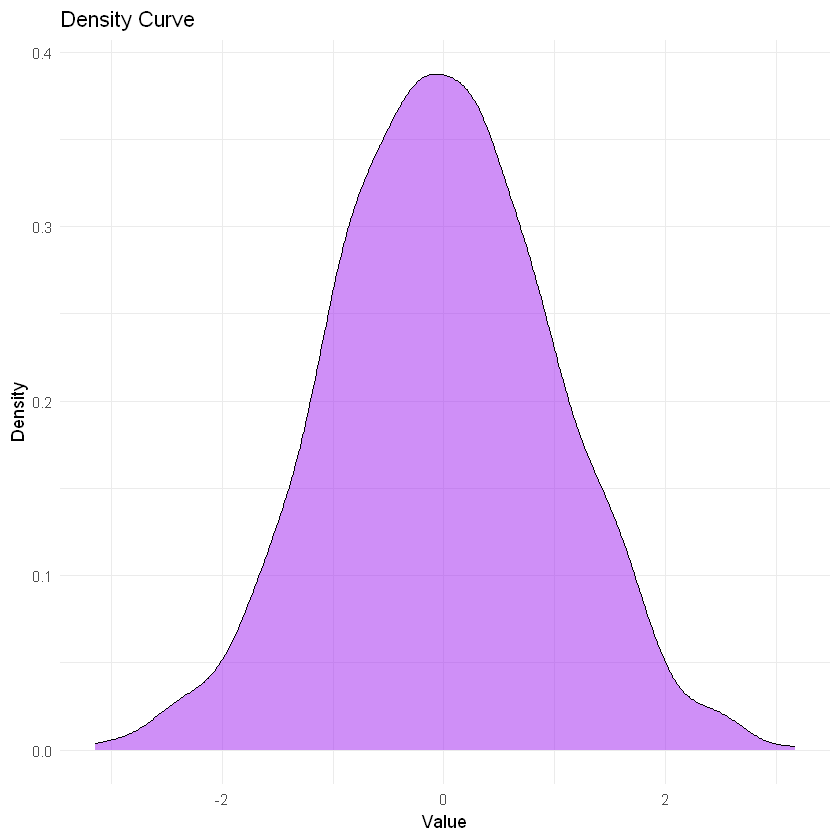

In [88]:
data <- data.frame(value = rnorm(1000))

ggplot(data, aes(x = value)) +
  geom_density(fill = "purple", alpha = 0.5) +
  labs(title = "Density Curve", x = "Value", y = "Density") +
  theme_minimal()

Warning message:
"Use of `data$value` is discouraged.
ℹ Use `value` instead."
Warning message:
"Use of `data$value` is discouraged.
ℹ Use `value` instead."
Warning message in geom_label(aes(x = mean(data$value), y = 0.4, label = "mean")):
"All aesthetics have length 1, but the data has 1000 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row."


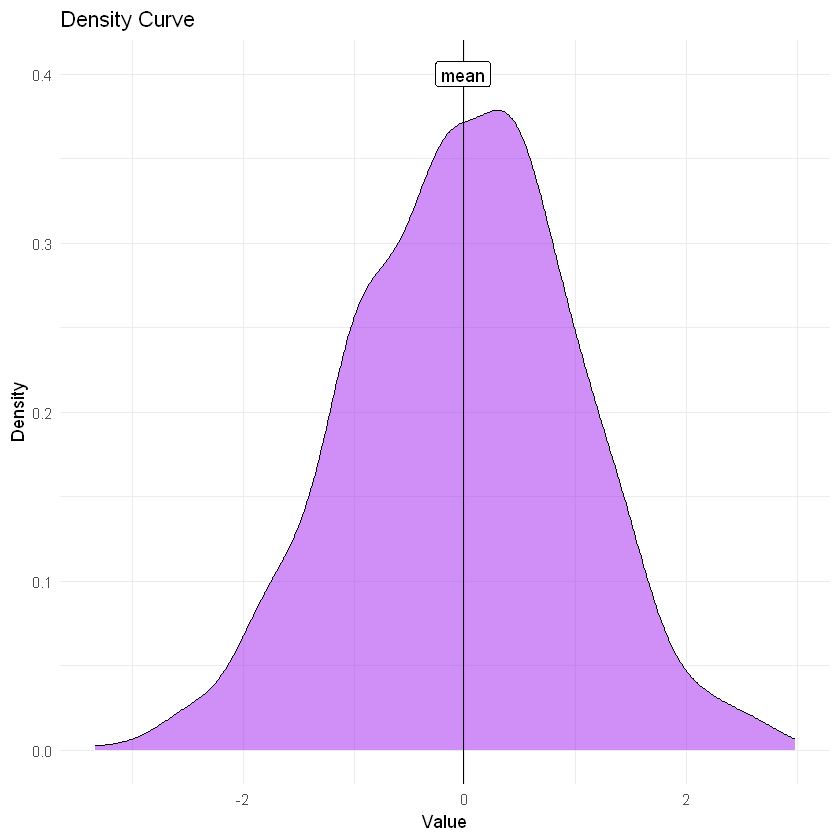

In [89]:
data <- data.frame(value = rnorm(1000))

ggplot(data, aes(x = value)) +
  geom_density(fill = "purple", alpha = 0.5) +
  geom_vline(aes(xintercept = mean(data$value))) +
  geom_label(aes(x = mean(data$value), y = 0.4, label = "mean")) +
  labs(title = "Density Curve", x = "Value", y = "Density") +
  theme_minimal()